# Predicting Data Scientist Career Paths: Strategic Insights for Recruitment and Retention

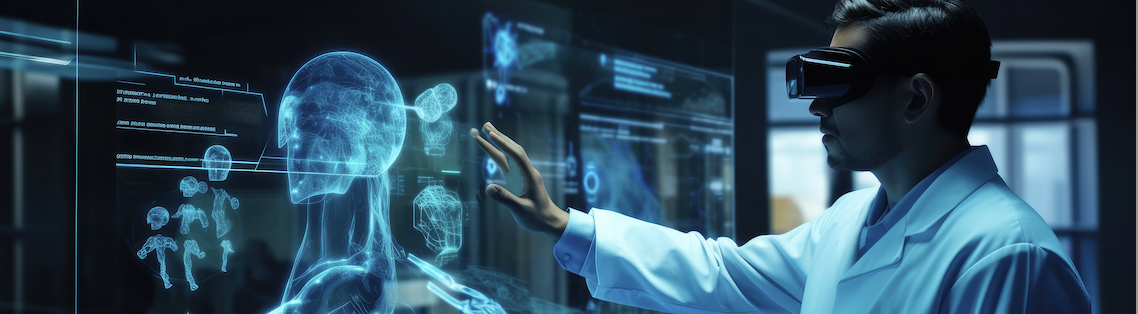

## 1. | Introduction

#### Business Understanding
A company which is active in Big Data and Data Science wants to hire data scientists among people who successfully pass some courses which conduct by the company. Many people signup for their training. Company wants to know which of these candidates are really wants to work for the company after training or looking for a new employment because it helps to reduce the cost and time as well as the quality of training or planning the courses and categorization of candidates. Information related to demographics, education, experience are provided.

This dataset is designed to understand the factors that lead a person to leave current job for HR researches too. By model(s) that uses the current credentials, demographics, experience data we will predict the probability of a candidate to look for a new job or will work for the company, as well as interpreting affected factors on employee decision.

#### Features
enrollee_id : Unique ID for candidate.

city: City code.

city_ development _index : Developement index of the city (scaled).

gender: Gender of candidate

relevent_experience: Relevant experience of candidate

enrolled_university: Type of University course enrolled if any

education_level: Education level of candidate

major_discipline :Education major discipline of candidate

experience: Candidate total experience in years

company_size: No of employees in current employer's company

company_type : Type of current employer

last_new_job: Difference in years between previous job and current job

training_hours: training hours completed

target: 0 – Not looking for job change, 1 – Looking for a job change


Data source: https://www.kaggle.com/datasets/arashnic/hr-analytics-job-change-of-data-scientists


#### Objectives and Motivations
In this project we aim to:

- Predict the probability of a candidate will work for the company.

- Interpret and evaluate the model(s) such a way that illustrate which features affect candidate decision and assess the accuracy of the model

#### Machine Learning Models
- CART Model Construction
- C5.0 Model Construction
- Naive Bayes Model Construction
- Neural Network Model Construction
- Logistic Regression Model Construction
- Random Forest Model Construction

## 2. | Importing Libraries

In [85]:
# --- Installing Libraries ---
#!pip install ydata-profiling
#!pip install pywaffle
#!pip install highlight-text
#!pip install ipywidgets
#!pip install colorama
#!pip install matplot
#!pip install yellowbrick
#!pip install scikit-learn
#!pip install plotly.express

In [86]:
#%matplotlib inline
#%matplotlib notebook  # For interactive plots in notebooks

In [87]:
# Define clr with attributes start and end
class Clr:
    start = '\033[1m'  # Bold text start
    end = '\033[0m'    # Bold text end
    color = '\033[94m' # Blue color text start

clr = Clr()

In [88]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)


In [89]:
# --- Importing Libraries ---
import numpy as np
import pandas as pd
import ydata_profiling
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import warnings
import os
import yellowbrick
import ipywidgets
import sklearn
import pywaffle
import highlight_text
import plotly.express as px
warnings.filterwarnings("ignore")

In [90]:
from ydata_profiling import ProfileReport
from pywaffle import Waffle
from PIL import Image
from highlight_text import fig_text
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import LabelEncoder, StandardScaler
from yellowbrick.classifier import ConfusionMatrix, ROCAUC, PrecisionRecallCurve
from yellowbrick.model_selection import LearningCurve, FeatureImportances
from yellowbrick.contrib.wrapper import wrap
from yellowbrick.style import set_palette
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

## 3. | Importing Training and Testing

In [91]:
# --- Importing Datasets ---
df_train = pd.read_csv(r"C:\Users\graha\Documents\MS Applied Data Science\ADS_502_Applied_Data_Mining\Project\ADS502_Group5\aug_train.csv")
df_test = pd.read_csv(r"C:\Users\graha\Documents\MS Applied Data Science\ADS_502_Applied_Data_Mining\Project\ADS502_Group5\aug_train.csv")

# --- Reading Train Dataset ---
print(clr.start+'.: Train Dataset :.'+clr.end)
print(clr.color+'*' * 21)

# --- Viewing Train Dataset ---
# Reset index to avoid showing index column
df_train_reset = df_train.head().reset_index(drop=True)

# Viewing styled DataFrame in Jupyter Notebook
# Use 'hide_index' to hide index when displaying DataFrame
df_train.head().style.background_gradient(cmap='Blues').set_table_styles(
     [{'selector': 'thead th:nth-of-type(1)',
      'props': 'display:none;'},  # Hide the index header
     {'selector': 'tbody th',
      'props': 'display:none;'},   # Hide the index column cells
     {'selector': 'td',
      'props': 'text-align: center;'},  # Center-align cell content
     {'selector': 'th',
      'props': 'text-align: center;'}    # Center-align header content
    ]
)




.: Train Dataset :.
*********************


In [92]:
# --- Reading Test Dataset ---
print(clr.start+'.: Test Dataset :.'+clr.end)
print(clr.color+'*' * 20)

# --- Viewing Train Dataset ---
# Reset index to avoid showing index column
df_train_reset = df_train.head().reset_index(drop=True)

# Viewing styled DataFrame in Jupyter Notebook
# Use 'hide_index' to hide index when displaying DataFrame
df_test.head().style.background_gradient(cmap='YlOrBr').set_table_styles(
     [{'selector': 'thead th:nth-of-type(1)',
      'props': 'display:none;'},  # Hide the index header
     {'selector': 'tbody th',
      'props': 'display:none;'},   # Hide the index column cells
     {'selector': 'td',
      'props': 'text-align: center;'},  # Center-align cell content
     {'selector': 'th',
      'props': 'text-align: center;'}    # Center-align header content
    ]
)

.: Test Dataset :.
********************


## 4. | Data Profiling

### 4.1 | Data Profiling Training

In [93]:
# --- Train Dataset Report ---
ProfileReport(df_train, title='Train Dataset', minimal=True, progress_bar=False, samples=None, correlations=None,interactions=None, explorative=True, dark_mode=True, notebook={'iframe':{'height': '600px'}}, html={'style':{'primary_color': '#219EBC'}}, missing_diagrams={'heatmap': False, 'dendrogram': False}).to_notebook_iframe()

### 4.2 | Data Profiling Testing

In [94]:
# --- Test Dataset Report ---
ProfileReport(df_test, title='Train Dataset', minimal=True, progress_bar=False, samples=None, correlations=None,interactions=None, explorative=True, dark_mode=True, notebook={'iframe':{'height': '600px'}}, html={'style':{'primary_color': '#219EBC'}}, missing_diagrams={'heatmap': False, 'dendrogram': False}).to_notebook_iframe()

## 5. | Clean, wrangle, and handle missing data - imputation

In [95]:
# Add the target column to df_test with value 3
df_test['target'] = 3

# Optionally, you might want to ensure the columns of df_train and df_test match
# Here, we assume df_train already has a 'target' column, and we are adding it to df_test.

# Append df_test to df_train
df_combined = pd.concat([df_train, df_test], ignore_index=True)

# Optionally, reset the index after concatenation
df_combined.reset_index(drop=True, inplace=True)

# Save the combined DataFrame to a new CSV file (if needed)
# df_combined.to_csv('path_to_combined_data.csv', index=False)

print(df_combined.head())

   enrollee_id      city  city_development_index gender  \
0         8949  city_103                   0.920   Male   
1        29725   city_40                   0.776   Male   
2        11561   city_21                   0.624    NaN   
3        33241  city_115                   0.789    NaN   
4          666  city_162                   0.767   Male   

       relevent_experience enrolled_university education_level  \
0  Has relevent experience       no_enrollment        Graduate   
1   No relevent experience       no_enrollment        Graduate   
2   No relevent experience    Full time course        Graduate   
3   No relevent experience                 NaN        Graduate   
4  Has relevent experience       no_enrollment         Masters   

  major_discipline experience company_size    company_type last_new_job  \
0             STEM        >20          NaN             NaN            1   
1             STEM         15        50-99         Pvt Ltd           >4   
2             STEM     

In [96]:
# Get the initial shape of the data frame
print(df_combined.shape)

(38316, 14)


In [97]:
# Get the data types of the columns
print(df_combined.dtypes)

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                    float64
dtype: object


In [98]:
# Identifying the missing values
print(df_combined.isnull().sum())

enrollee_id                   0
city                          0
city_development_index        0
gender                     9016
relevent_experience           0
enrolled_university         772
education_level             920
major_discipline           5626
experience                  130
company_size              11876
company_type              12280
last_new_job                846
training_hours                0
target                        0
dtype: int64


In [99]:
# Get unique counts of gender column
print(df_combined['gender'].value_counts(), '\n')
# Get unique items in enrolled_university column
print(df_combined['enrolled_university'].value_counts(), '\n')
# Get unique items in education_level column
print(df_combined['education_level'].value_counts(), '\n')
# Get unique items in major_discipline column
print(df_combined['major_discipline'].value_counts(), '\n')
# Get unique items in experience column
print(df_combined['experience'].value_counts(), '\n')
# Get unique items in company_size column
print(df_combined['company_size'].value_counts(), '\n')
# Get unique items in company_type column
print(df_combined['company_type'].value_counts(), '\n')
# Get unique items in last_new_job column
print(df_combined['last_new_job'].value_counts())

gender
Male      26442
Female     2476
Other       382
Name: count, dtype: int64 

enrolled_university
no_enrollment       27634
Full time course     7514
Part time course     2396
Name: count, dtype: int64 

education_level
Graduate          23196
Masters            8722
High School        4034
Phd                 828
Primary School      616
Name: count, dtype: int64 

major_discipline
STEM               28984
Humanities          1338
Other                762
Business Degree      654
Arts                 506
No Major             446
Name: count, dtype: int64 

experience
>20    6572
5      2860
4      2806
3      2708
6      2432
2      2254
7      2056
10     1970
9      1960
8      1604
15     1372
11     1328
14     1172
1      1098
<1     1044
16     1016
12      988
13      798
17      684
19      608
18      560
20      296
Name: count, dtype: int64 

company_size
50-99        6166
100-500      5142
10000+       4038
10/49        2942
1000-4999    2656
<10          2616
500-999 

In [100]:
# create a data frame that will be cleaned missing values
cleaned_df = df_combined.copy()

# Drop missing gender values
cleaned_df.dropna(subset=['gender'], inplace=True)
# Impute missing of enrolled_university column using mode
cleaned_df['enrolled_university'].fillna(cleaned_df['enrolled_university'].mode()[0], inplace=True)
# impute the missing values of education_level column using mode
cleaned_df['education_level'].fillna(cleaned_df['education_level'].mode()[0], inplace=True)
# impute the missing values of major_discipline column using mode
cleaned_df['major_discipline'].fillna(cleaned_df['major_discipline'].mode()[0], inplace=True)
# Drop the missing values of experience column
cleaned_df.dropna(subset=['experience'], inplace=True)
# impute the missing values of company_size column using XXXXXXXXX
cleaned_df.dropna(subset=['company_size'], inplace=True)
# impute the missing values of company_type column using XXXXXXXXX
cleaned_df.dropna(subset=['company_type'], inplace=True)
# Drop the missing values of last_new_job column
cleaned_df.dropna(subset=['last_new_job'], inplace=True)
# Get the shape of the cleaned data frame
print(cleaned_df.shape)
print(cleaned_df.isnull().sum())

(19518, 14)
enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64


## 6. | EDA

In [101]:
# Example DataFrames (Replace these with your actual DataFrames)
# df_combined = pd.read_csv('path_to_combined_data.csv')

# Separate the test set (where target == 3)
df_test = cleaned_df[cleaned_df['target'] == 3]

# Remove the target column from the test set
df_test = df_test.drop(columns=['target'])

# Separate the train set (where target != 3)
df_train = cleaned_df[cleaned_df['target'] != 3]

# Optionally, reset the index for both DataFrames
df_test.reset_index(drop=True, inplace=True)
df_train.reset_index(drop=True, inplace=True)

# Save the separate DataFrames to CSV files (if needed)
# df_train.to_csv('path_to_train_data.csv', index=False)
# df_test.to_csv('path_to_test_data.csv', index=False)

print("Training Set:")
print(df_train.head())

print("Test Set:")
print(df_test.head())
df_train

Training Set:
   enrollee_id      city  city_development_index gender  \
0        29725   city_40                   0.776   Male   
1          666  city_162                   0.767   Male   
2        28806  city_160                   0.920   Male   
3          402   city_46                   0.762   Male   
4        27107  city_103                   0.920   Male   

       relevent_experience enrolled_university education_level  \
0   No relevent experience       no_enrollment        Graduate   
1  Has relevent experience       no_enrollment         Masters   
2  Has relevent experience       no_enrollment     High School   
3  Has relevent experience       no_enrollment        Graduate   
4  Has relevent experience       no_enrollment        Graduate   

  major_discipline experience company_size    company_type last_new_job  \
0             STEM         15        50-99         Pvt Ltd           >4   
1             STEM        >20        50-99  Funded Startup            4   
2        

enrollee_id      city  city_development_index  gender  \
0           29725   city_40                   0.776    Male   
1             666  city_162                   0.767    Male   
2           28806  city_160                   0.920    Male   
3             402   city_46                   0.762    Male   
4           27107  city_103                   0.920    Male   
...           ...       ...                     ...     ...   
9754          251  city_103                   0.920    Male   
9755        32313  city_160                   0.920  Female   
9756        29754  city_103                   0.920  Female   
9757        24576  city_103                   0.920    Male   
9758         5756   city_65                   0.802    Male   

          relevent_experience enrolled_university education_level  \
0      No relevent experience       no_enrollment        Graduate   
1     Has relevent experience       no_enrollment         Masters   
2     Has relevent experience       no_enrollment     High School   
3     Has relevent experience       no_enrollment        Graduate   
4     Has relevent experience       no_enrollment        Graduate   
...                       ...                 ...             ...   
9754  Has relevent experience       no_enrollment         Masters   
9755  Has relevent experience       no_enrollment        Graduate   
9756  Has relevent experience       no_enrollment        Graduate   
9757  Has relevent experience       no_enrollment        Graduate   
9758  Has relevent experience       no_enrollment     High School   

     major_discipline experience company_size    company_type last_new_job  \
0                STEM         15        50-99         Pvt Ltd           >4   
1                STEM        >20        50-99  Funded Startup            4   
2                STEM          5        50-99  Funded Startup            1   
3                STEM         13          <10         Pvt Ltd           >4   
4                STEM          7        50-99         Pvt Ltd            1   
...               ...        ...          ...             ...          ...   
9754             STEM          9        50-99         Pvt Ltd            1   
9755             STEM         10      100-500   Public Sector            3   
9756       Humanities          7        10/49  Funded Startup            1   
9757             STEM        >20        50-99         Pvt Ltd            4   
9758             STEM         <1      500-999         Pvt Ltd            2   

      training_hours  target  
0                 47     0.0  
1                  8     0.0  
2                 24     0.0  
3                 18     1.0  
4                 46     1.0  
...              ...     ...  
9754              36     1.0  
9755              23     0.0  
9756              25     0.0  
9757              44     0.0  
9758              97     0.0  

[9759 rows x 14 columns]

### 6.1 | Exploring target

1 = looking for new job

0 = not looking for new job

In [102]:
aug_train_dropped = df_train

In [103]:
aug_train_dropped

enrollee_id      city  city_development_index  gender  \
0           29725   city_40                   0.776    Male   
1             666  city_162                   0.767    Male   
2           28806  city_160                   0.920    Male   
3             402   city_46                   0.762    Male   
4           27107  city_103                   0.920    Male   
...           ...       ...                     ...     ...   
9754          251  city_103                   0.920    Male   
9755        32313  city_160                   0.920  Female   
9756        29754  city_103                   0.920  Female   
9757        24576  city_103                   0.920    Male   
9758         5756   city_65                   0.802    Male   

          relevent_experience enrolled_university education_level  \
0      No relevent experience       no_enrollment        Graduate   
1     Has relevent experience       no_enrollment         Masters   
2     Has relevent experience       no_enrollment     High School   
3     Has relevent experience       no_enrollment        Graduate   
4     Has relevent experience       no_enrollment        Graduate   
...                       ...                 ...             ...   
9754  Has relevent experience       no_enrollment         Masters   
9755  Has relevent experience       no_enrollment        Graduate   
9756  Has relevent experience       no_enrollment        Graduate   
9757  Has relevent experience       no_enrollment        Graduate   
9758  Has relevent experience       no_enrollment     High School   

     major_discipline experience company_size    company_type last_new_job  \
0                STEM         15        50-99         Pvt Ltd           >4   
1                STEM        >20        50-99  Funded Startup            4   
2                STEM          5        50-99  Funded Startup            1   
3                STEM         13          <10         Pvt Ltd           >4   
4                STEM          7        50-99         Pvt Ltd            1   
...               ...        ...          ...             ...          ...   
9754             STEM          9        50-99         Pvt Ltd            1   
9755             STEM         10      100-500   Public Sector            3   
9756       Humanities          7        10/49  Funded Startup            1   
9757             STEM        >20        50-99         Pvt Ltd            4   
9758             STEM         <1      500-999         Pvt Ltd            2   

      training_hours  target  
0                 47     0.0  
1                  8     0.0  
2                 24     0.0  
3                 18     1.0  
4                 46     1.0  
...              ...     ...  
9754              36     1.0  
9755              23     0.0  
9756              25     0.0  
9757              44     0.0  
9758              97     0.0  

[9759 rows x 14 columns]

In [104]:
print(aug_train_dropped['company_size'].value_counts())
print(aug_train_dropped['target'].value_counts())

company_size
50-99        2189
100-500      1959
10000+       1531
10/49        1065
1000-4999    1004
<10           957
500-999       632
5000-9999     422
Name: count, dtype: int64
target
0.0    8173
1.0    1586
Name: count, dtype: int64


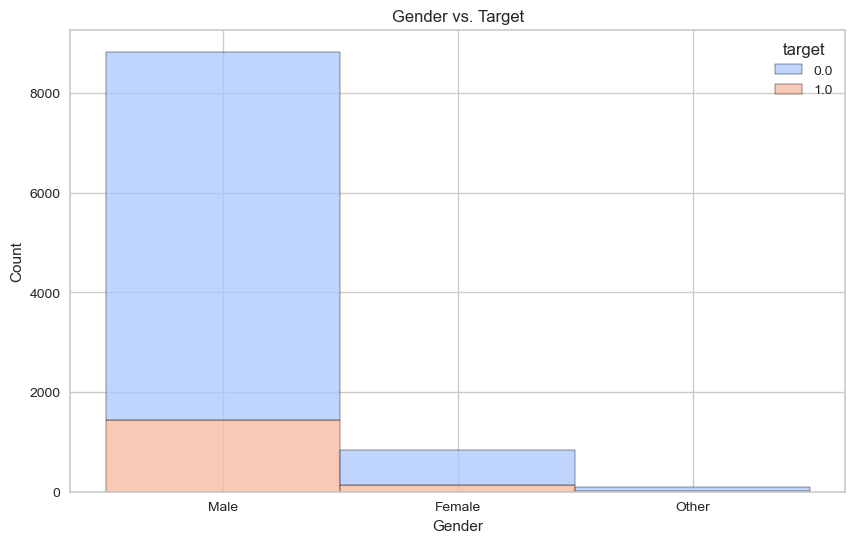

In [105]:
# Stacked bar plot: Gender vs. Target
%matplotlib inline
plt.figure(figsize=(10, 6))
sns.histplot(data=aug_train_dropped, x='gender', hue='target', multiple='stack', palette='coolwarm')
plt.title('Gender vs. Target')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

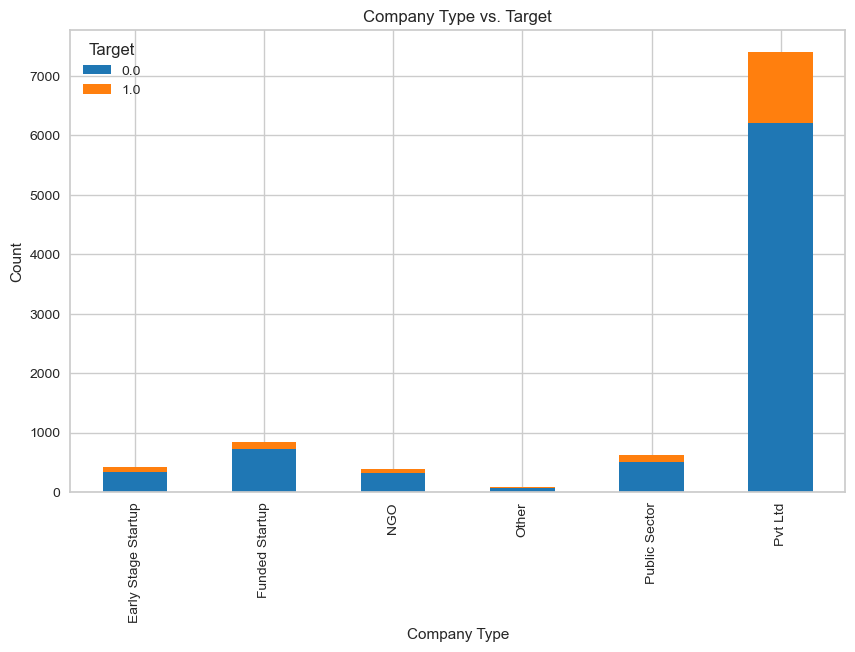

In [106]:
# Create a cross-tabulation of company_type and target
company_target_crosstab = pd.crosstab(aug_train_dropped['company_type'], aug_train_dropped['target'])

# Plot the stacked bar plot
company_target_crosstab.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#1f77b4', '#ff7f0e'])
plt.title('Company Type vs. Target')
plt.xlabel('Company Type')
plt.ylabel('Count')
plt.legend(title='Target')
plt.show()

In [107]:
print(aug_train_dropped['company_size'].value_counts())
print(aug_train_dropped['target'].value_counts())

company_size
50-99        2189
100-500      1959
10000+       1531
10/49        1065
1000-4999    1004
<10           957
500-999       632
5000-9999     422
Name: count, dtype: int64
target
0.0    8173
1.0    1586
Name: count, dtype: int64


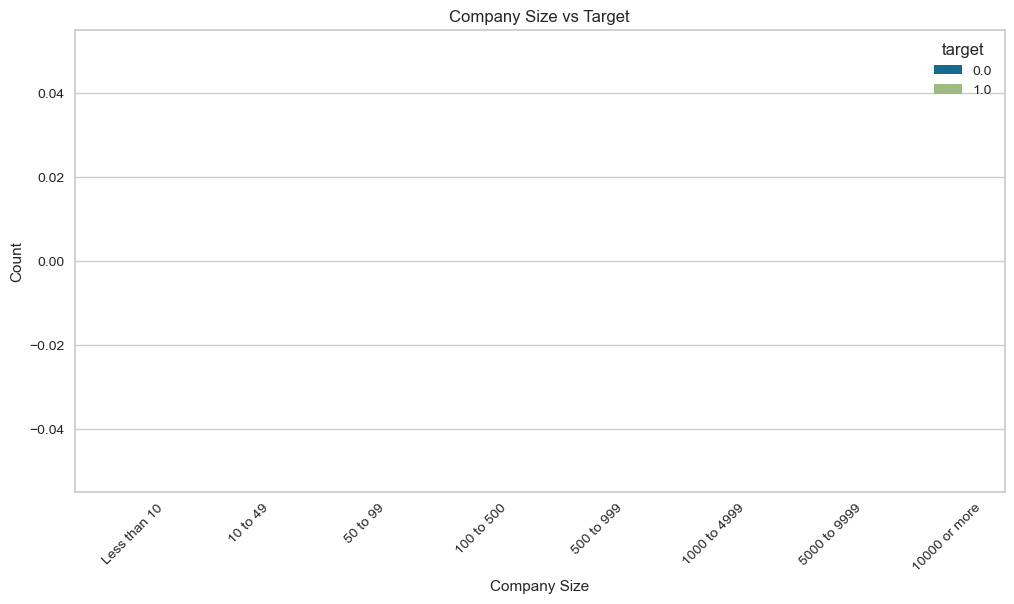

In [108]:
# Define the correct order for company size categories
size_order = ['Less than 10', '10 to 49', '50 to 99', '100 to 500', '500 to 999', '1000 to 4999', '5000 to 9999', '10000 or more']
aug_train_dropped['company_size'] = pd.Categorical(aug_train_dropped['company_size'], categories=size_order, ordered=True)

# Recreate the plots
# 1. Bar plot: Company Size vs. Target
plt.figure(figsize=(12, 6))
sns.countplot(x='company_size', hue='target', data=aug_train_dropped, order=size_order)
plt.title('Company Size vs Target')
plt.xlabel('Company Size')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')


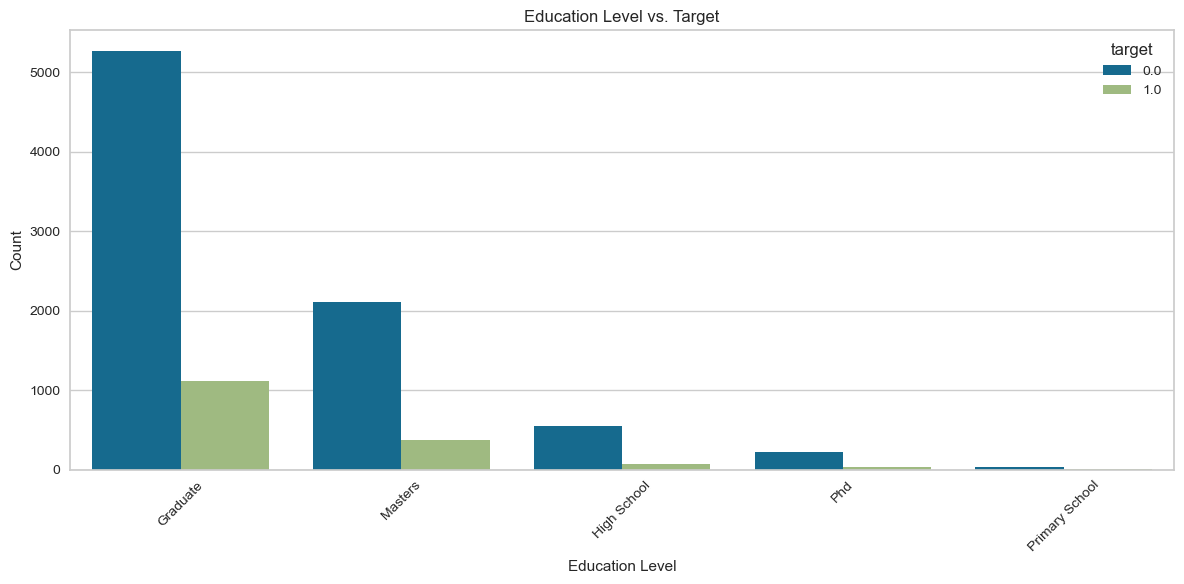

In [109]:
# Check if 'education_level' column exists
print(aug_train_dropped.columns)

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.countplot(x='education_level', hue='target', data=aug_train_dropped)
plt.title('Education Level vs. Target')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to prevent clipping of tick labels
plt.show()


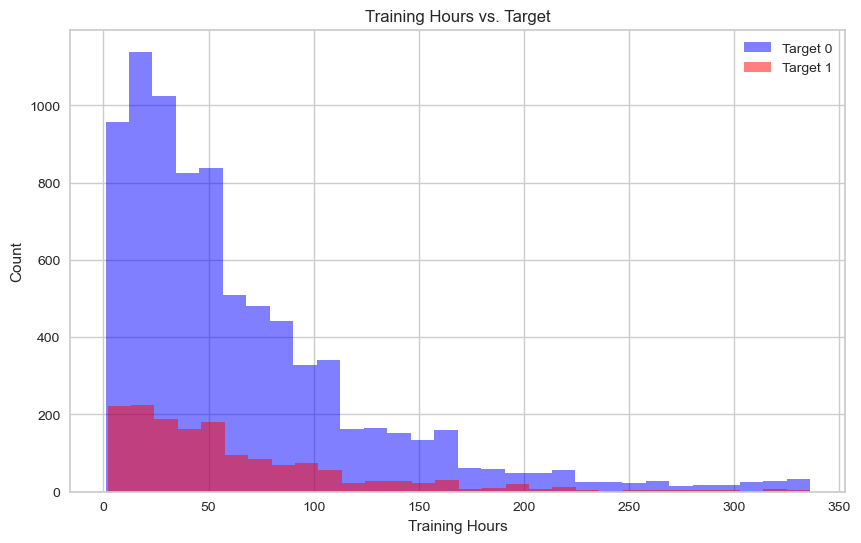

In [110]:
# Create bins for training_hours
bins = 30

# Create a figure
plt.figure(figsize=(10, 6))

# Plot the histogram for target=0
plt.hist(aug_train_dropped[aug_train_dropped['target'] == 0]['training_hours'], bins=bins, alpha=0.5, label='Target 0', color='blue')

# Plot the histogram for target=1
plt.hist(aug_train_dropped[aug_train_dropped['target'] == 1]['training_hours'], bins=bins, alpha=0.5, label='Target 1', color='red')

# Add titles and labels
plt.title('Training Hours vs. Target')
plt.xlabel('Training Hours')
plt.ylabel('Count')
plt.legend(loc='upper right')

# Show the plot
plt.show()

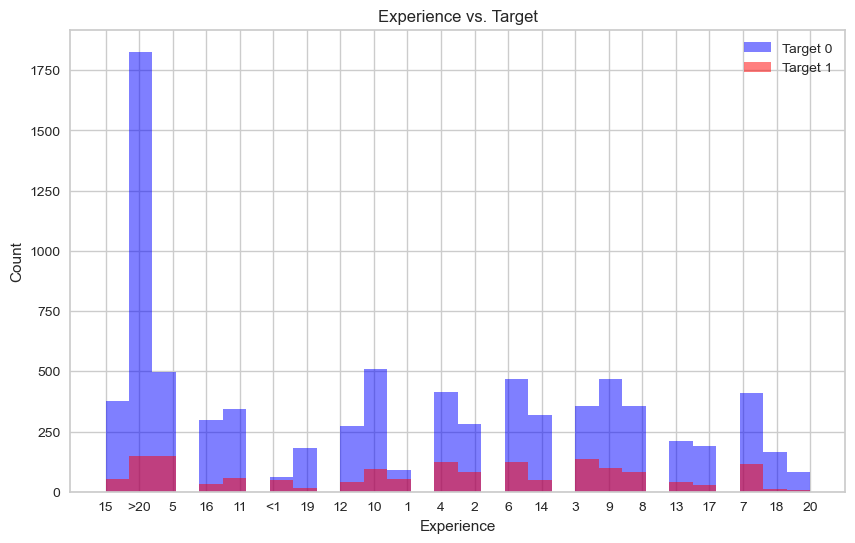

In [111]:
# Create bins for experience
bins = 30  # Adjust this number to change the number of bins

# Create a figure
plt.figure(figsize=(10, 6))

# Plot the histogram for target=0
plt.hist(aug_train_dropped[aug_train_dropped['target'] == 0]['experience'], bins=bins, alpha=0.5, label='Target 0', color='blue')

# Plot the histogram for target=1
plt.hist(aug_train_dropped[aug_train_dropped['target'] == 1]['experience'], bins=bins, alpha=0.5, label='Target 1', color='red')

# Add titles and labels
plt.title('Experience vs. Target')
plt.xlabel('Experience')
plt.ylabel('Count')
plt.legend(loc='upper right')

# Show the plot
plt.show()

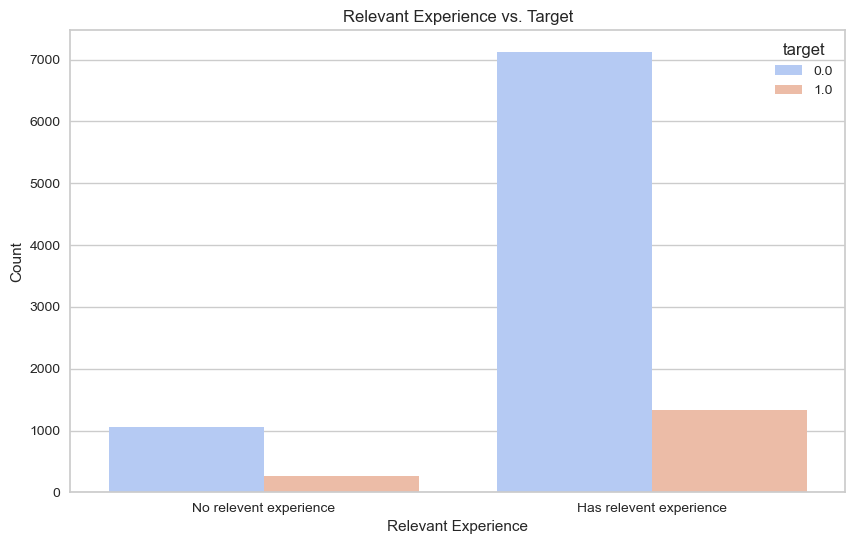

In [112]:
# Bar plot: Relevant Experience vs. Target
plt.figure(figsize=(10, 6))
sns.countplot(x='relevent_experience', hue='target', data=aug_train_dropped, palette='coolwarm')
plt.title('Relevant Experience vs. Target')
plt.xlabel('Relevant Experience')
plt.ylabel('Count')
plt.show()

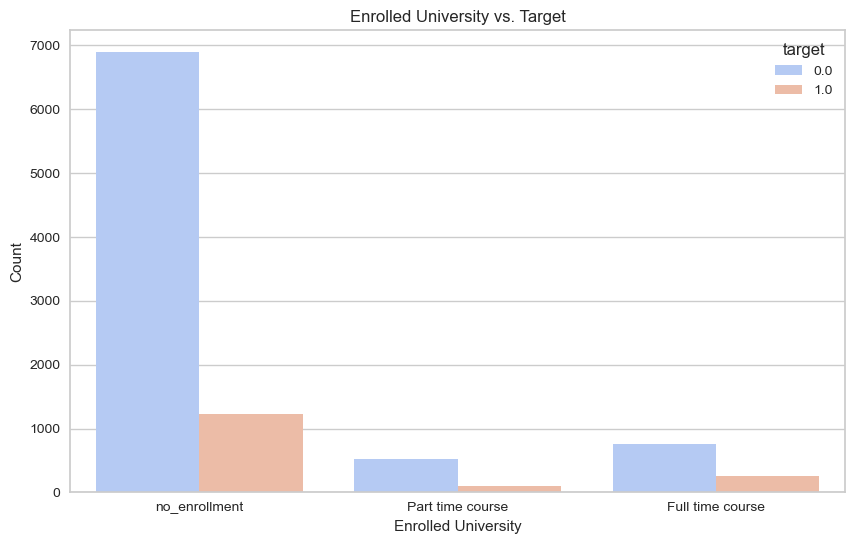

In [113]:
# Bar plot: Enrolled University vs. Target
plt.figure(figsize=(10, 6))
sns.countplot(x='enrolled_university', hue='target', data=aug_train_dropped, palette='coolwarm')
plt.title('Enrolled University vs. Target')
plt.xlabel('Enrolled University')
plt.ylabel('Count')
plt.show()

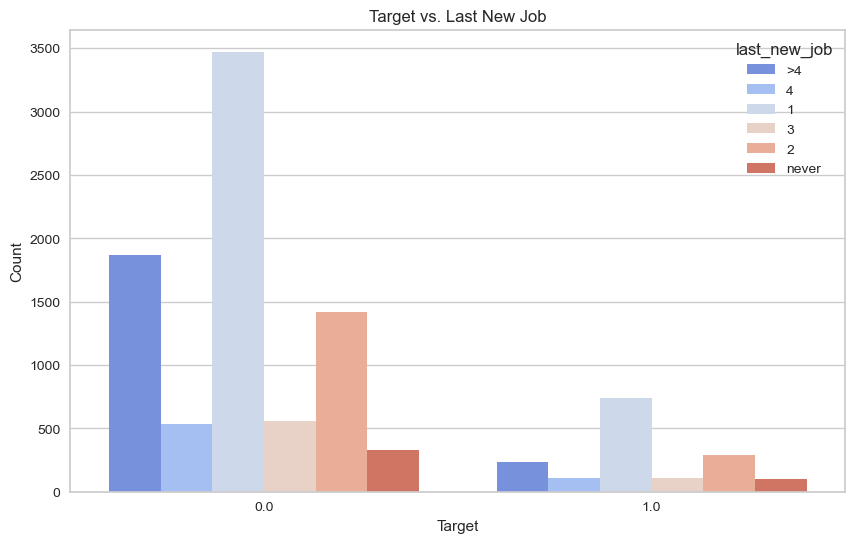

In [114]:
plt.figure(figsize=(10, 6))
sns.countplot(x='target', hue='last_new_job', data=aug_train_dropped, palette='coolwarm')
plt.title('Target vs. Last New Job')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

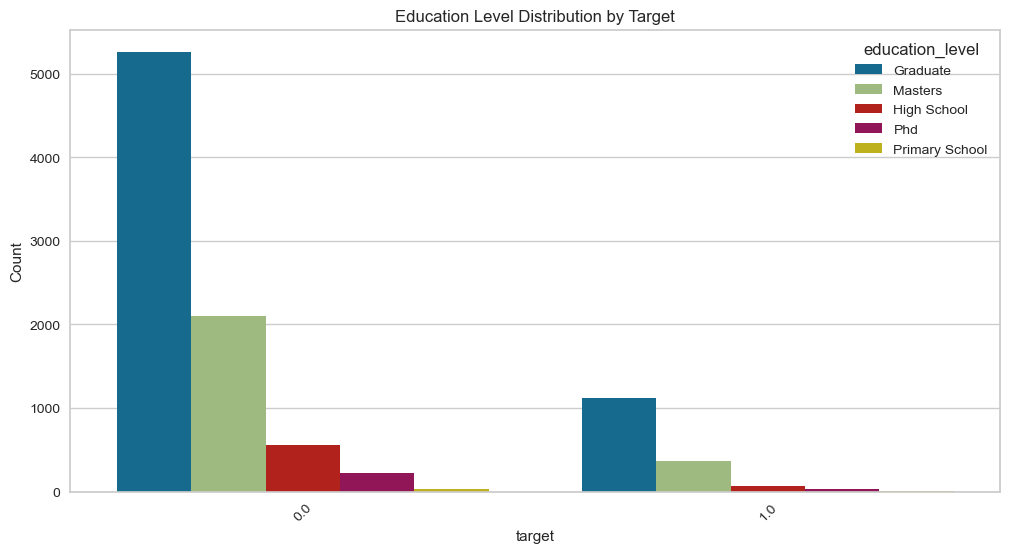

In [115]:
plt.figure(figsize=(12, 6))
sns.countplot(x='target', hue='education_level', data=aug_train_dropped)
plt.title('Education Level Distribution by Target')
plt.xlabel('target')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

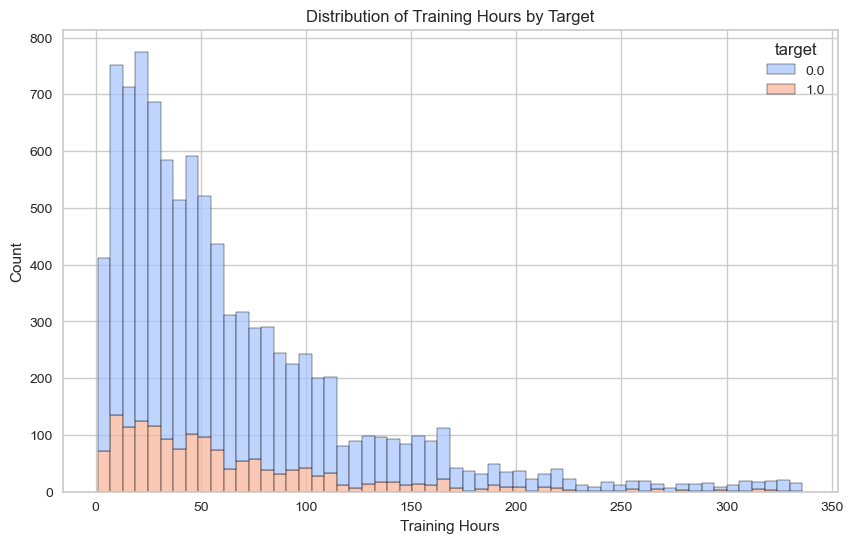

In [116]:
plt.figure(figsize=(10, 6))
sns.histplot(data=aug_train_dropped, x='training_hours', hue='target', multiple='stack', palette='coolwarm')
plt.title('Distribution of Training Hours by Target')
plt.xlabel('Training Hours')
plt.ylabel('Count')
plt.show()

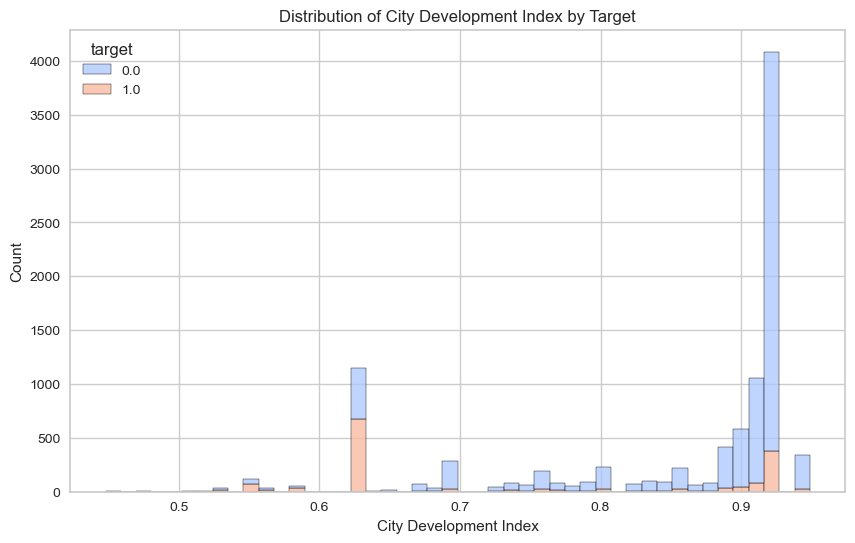

In [117]:
plt.figure(figsize=(10, 6))
sns.histplot(data=aug_train_dropped, x='city_development_index', hue='target', multiple='stack', palette='coolwarm')
plt.title('Distribution of City Development Index by Target')
plt.xlabel('City Development Index')
plt.ylabel('Count')
plt.show()

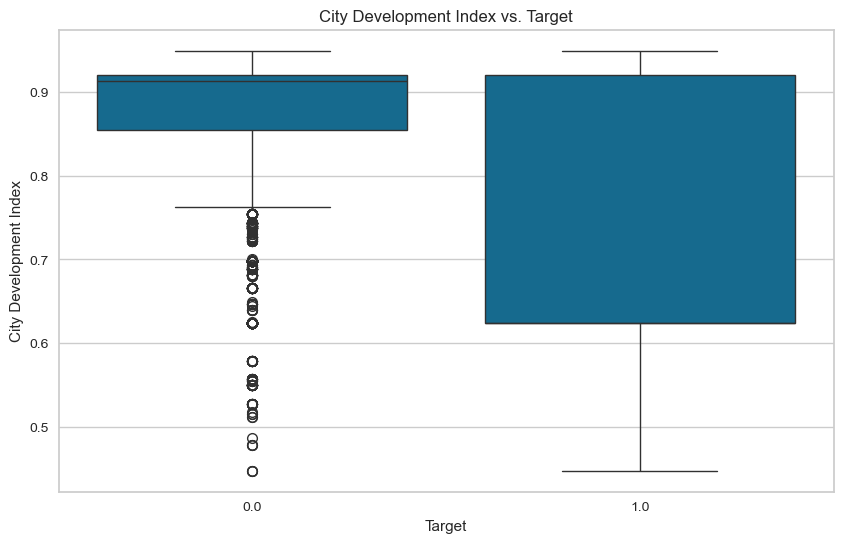

In [118]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='city_development_index', data=aug_train_dropped)
plt.title('City Development Index vs. Target')
plt.xlabel('Target')
plt.ylabel('City Development Index')
plt.show()

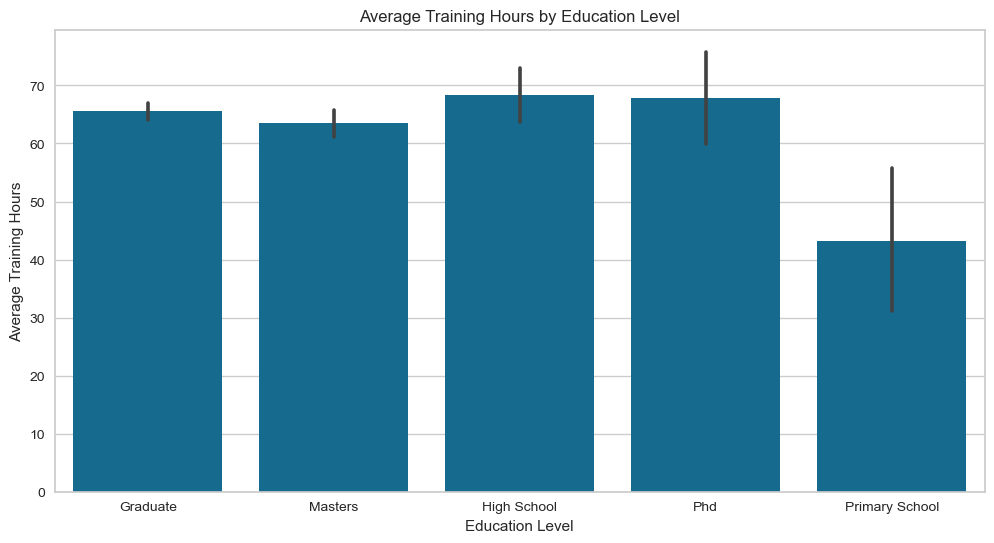

In [119]:
# Bar plot of average training hours by education level
plt.figure(figsize=(12, 6))
sns.barplot(x='education_level', y='training_hours', data=aug_train_dropped)
plt.title('Average Training Hours by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Average Training Hours')
plt.show()

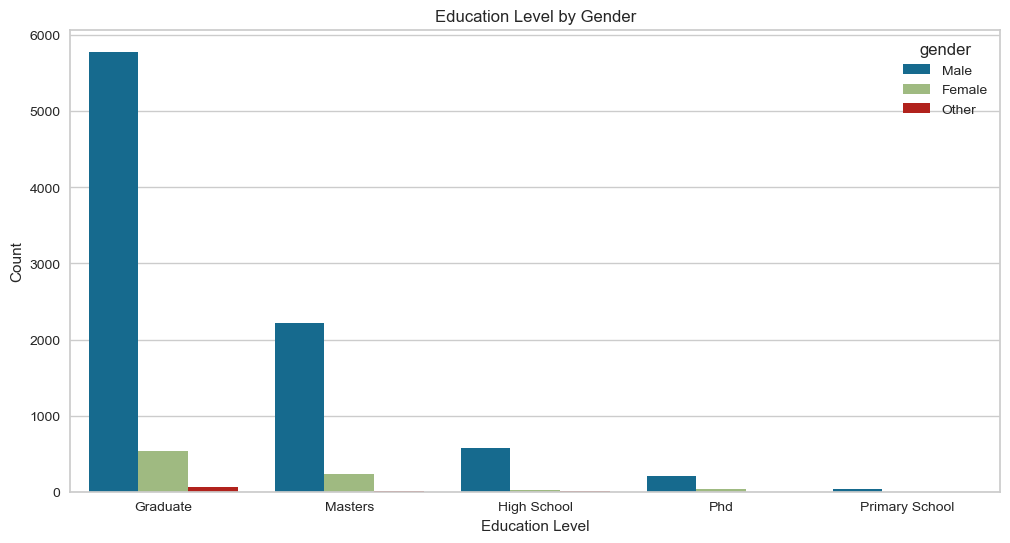

In [120]:
# Bar plot of education level by gender
plt.figure(figsize=(12, 6))
sns.countplot(x='education_level', hue='gender', data=aug_train_dropped)
plt.title('Education Level by Gender')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

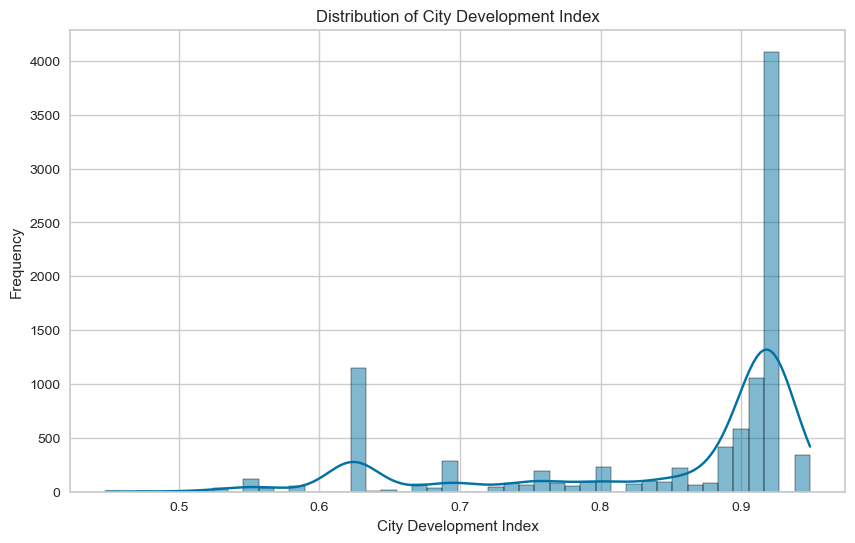

In [121]:
# Histogram for city development index
plt.figure(figsize=(10, 6))
sns.histplot(aug_train_dropped['city_development_index'], kde=True)
plt.title('Distribution of City Development Index')
plt.xlabel('City Development Index')
plt.ylabel('Frequency')
plt.show()

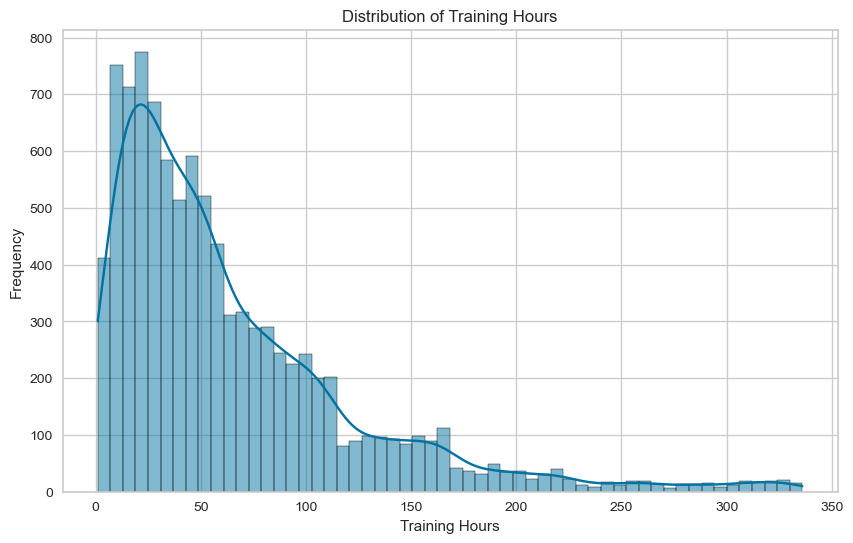

In [122]:
# Histogram for training hours
plt.figure(figsize=(10, 6))
sns.histplot(aug_train_dropped['training_hours'], kde=True)
plt.title('Distribution of Training Hours')
plt.xlabel('Training Hours')
plt.ylabel('Frequency')
plt.show()

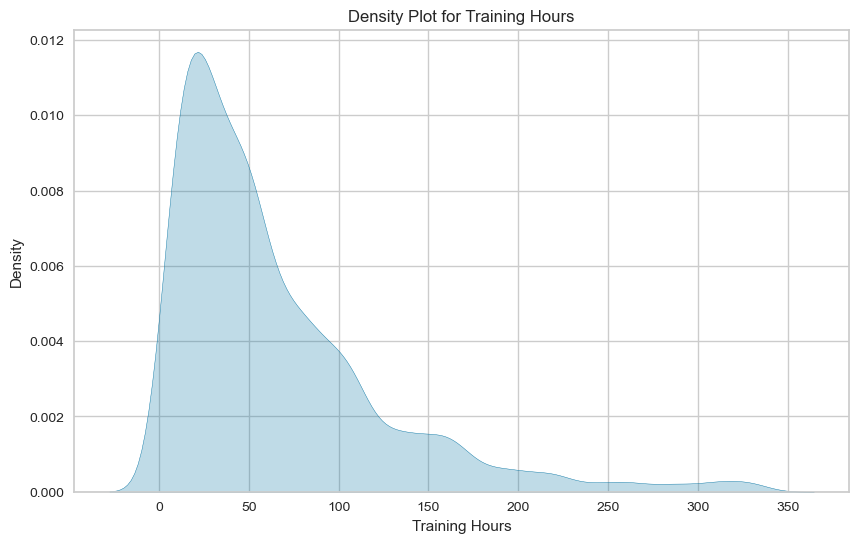

In [123]:
plt.figure(figsize=(10, 6))
sns.kdeplot(aug_train_dropped['training_hours'], shade=True)
plt.title('Density Plot for Training Hours')
plt.xlabel('Training Hours')
plt.ylabel('Density')
plt.show()

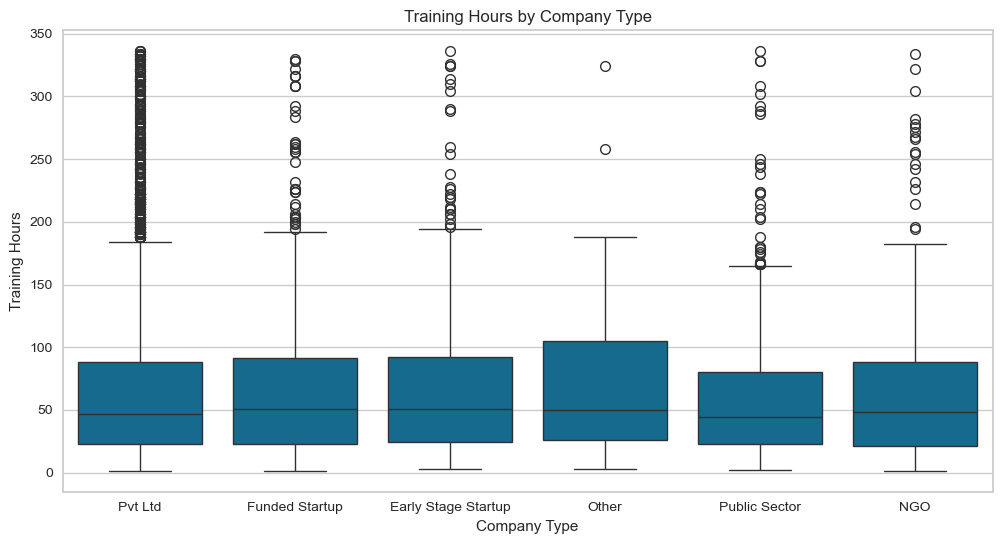

In [124]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='company_type', y='training_hours', data=aug_train_dropped)
plt.title('Training Hours by Company Type')
plt.xlabel('Company Type')
plt.ylabel('Training Hours')
plt.show()

### 6.2 Explore Company Type

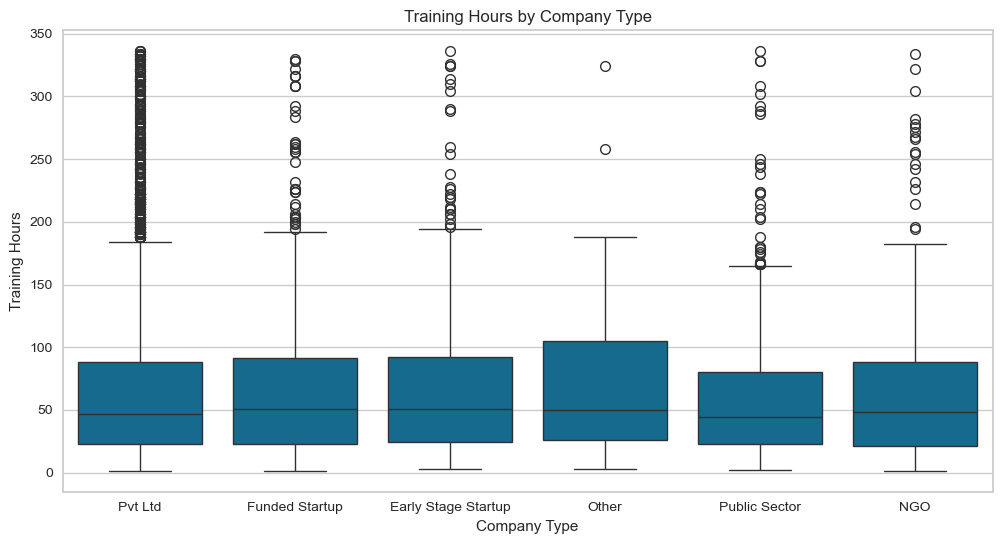

In [125]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='company_type', y='training_hours', data=aug_train_dropped)
plt.title('Training Hours by Company Type')
plt.xlabel('Company Type')
plt.ylabel('Training Hours')
plt.show()

### 6.3 | Explore Company Size

In [126]:
# 2. Box plot: Training Hours by Company Size
#plt.figure(figsize=(12, 6))
#sns.boxplot(x='company_size', y='training_hours', data=aug_train_dropped, order=size_order)
#plt.title('Training Hours by Company Size')
#plt.xlabel('Company Size')
#plt.ylabel('Training Hours')
#plt.xticks(rotation=45)
#plt.show()


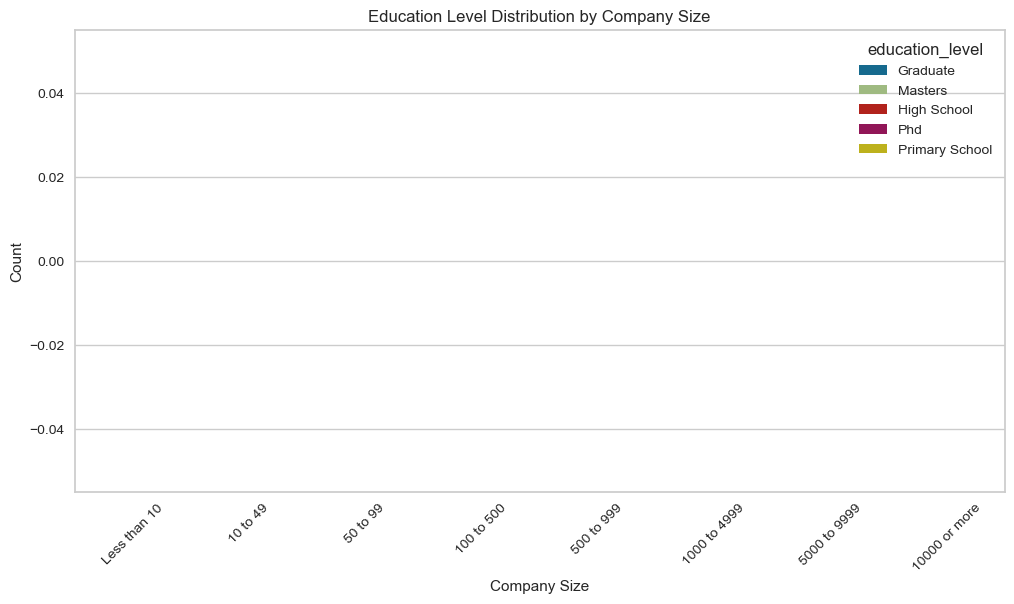

In [127]:
# 3. Count plot: Company Size vs. Education Level
plt.figure(figsize=(12, 6))
sns.countplot(x='company_size', hue='education_level', data=aug_train_dropped, order=size_order)
plt.title('Education Level Distribution by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## 7. | Data Pre - procesing

### 7.1 | Features Engineering

1. Experience and Training Metrics
Experience_per_Training_Hour: Create a feature that measures the ratio of experience to training hours. This can give an indication of how much experience is leveraged per unit of training.

In [128]:
# Define custom transformers
class ExperienceTrainingRatio(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X['experience'] = X['experience'].apply(lambda x: float(x.replace('>', '').replace('<', '0')) if isinstance(x, str) else x)
        X['Experience_per_Training_Hour'] = X['experience'] / (X['training_hours'] + 1)  # Adding 1 to avoid division by zero
        return X

2. Company Features
Company_Stability: Create a feature that reflects the stability or change of job in the company. For example, you could combine company_size and company_type into a single feature indicating company stability.

In [129]:
class CompanyStabilityFeature(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        size_mapping = {
            'nan': -1,
            '10/49': 1,
            '50-99': 2,
            '100-499': 3,
            '500-999': 4,
            '1000-4999': 5,
            '5000-9999': 6,
            '10000+': 7
        }
        X['company_size'] = X['company_size'].map(size_mapping).fillna(-1)
        
        company_type_mapping = {
            'nan': 0,
            'Pvt Ltd': 1,
            'Public Sector': 2,
            'Others': 3
        }
        X['company_type'] = X['company_type'].map(company_type_mapping).fillna(0)
        
        X['Company_Stability'] = X['company_size'] * X['company_type']
        return X

3. City and Education Metrics
City_Development_Education: Combine city_development_index and education_level to create a metric that reflects the development status adjusted by educational attainment.

In [130]:
class CityEducationMetric(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        education_level_mapping = {
            'PhD': 5,
            'Masters': 4,
            'Graduate': 3,
            'Undergraduate': 2,
            'High School': 1
        }
        X['education_level'] = X['education_level'].map(education_level_mapping).fillna(0)
        
        X['City_Development_Education'] = X['city_development_index'] * X['education_level']
        return X


4. Job Change and Experience
Job_Change_Experience: Create a feature that reflects how recent the last job change is, adjusted by experience. This feature may indicate the candidate's recentness in job changes and experience.

In [131]:
class JobChangeExperience(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X['last_new_job'] = X['last_new_job'].map({
            '1': 1,
            '2': 2,
            '3': 3,
            '4': 4,
            '>4': 5,
            'nan': 0
        }).fillna(0)

        X['Job_Change_Experience'] = X['last_new_job'] / (X['experience'] + 1)  # Adding 1 to avoid division by zero
        return X

In [132]:
# Define the preprocessing pipeline
preprocessor = Pipeline(steps=[
    ('experience_training_ratio', ExperienceTrainingRatio()),
    ('company_stability', CompanyStabilityFeature()),
    ('city_education', CityEducationMetric()),
    ('job_change_experience', JobChangeExperience())
])
# Apply transformations
df_combined_transformed = preprocessor.fit_transform(cleaned_df)
df_combined_transformed

enrollee_id      city  city_development_index  gender  \
1            29725   city_40                   0.776    Male   
4              666  city_162                   0.767    Male   
6            28806  city_160                   0.920    Male   
7              402   city_46                   0.762    Male   
8            27107  city_103                   0.920    Male   
...            ...       ...                     ...     ...   
38307          251  city_103                   0.920    Male   
38308        32313  city_160                   0.920  Female   
38310        29754  city_103                   0.920  Female   
38313        24576  city_103                   0.920    Male   
38314         5756   city_65                   0.802    Male   

           relevent_experience enrolled_university  education_level  \
1       No relevent experience       no_enrollment              3.0   
4      Has relevent experience       no_enrollment              4.0   
6      Has relevent experience       no_enrollment              1.0   
7      Has relevent experience       no_enrollment              3.0   
8      Has relevent experience       no_enrollment              3.0   
...                        ...                 ...              ...   
38307  Has relevent experience       no_enrollment              4.0   
38308  Has relevent experience       no_enrollment              3.0   
38310  Has relevent experience       no_enrollment              3.0   
38313  Has relevent experience       no_enrollment              3.0   
38314  Has relevent experience       no_enrollment              1.0   

      major_discipline  experience  company_size  company_type  last_new_job  \
1                 STEM        15.0           2.0           1.0           5.0   
4                 STEM        20.0           2.0           0.0           4.0   
6                 STEM         5.0           2.0           0.0           1.0   
7                 STEM        13.0          -1.0           1.0           5.0   
8                 STEM         7.0           2.0           1.0           1.0   
...                ...         ...           ...           ...           ...   
38307             STEM         9.0           2.0           1.0           1.0   
38308             STEM        10.0          -1.0           2.0           3.0   
38310       Humanities         7.0           1.0           0.0           1.0   
38313             STEM        20.0           2.0           1.0           4.0   
38314             STEM         1.0           4.0           1.0           2.0   

       training_hours  target  Experience_per_Training_Hour  \
1                  47     0.0                      0.312500   
4                   8     0.0                      2.222222   
6                  24     0.0                      0.200000   
7                  18     1.0                      0.684211   
8                  46     1.0                      0.148936   
...               ...     ...                           ...   
38307              36     3.0                      0.243243   
38308              23     3.0                      0.416667   
38310              25     3.0                      0.269231   
38313              44     3.0                      0.444444   
38314              97     3.0                      0.010204   

       Company_Stability  City_Development_Education  Job_Change_Experience  
1                    2.0                       2.328               0.312500  
4                    0.0                       3.068               0.190476  
6                    0.0                       0.920               0.166667  
7                   -1.0                       2.286               0.357143  
8                    2.0                       2.760               0.125000  
...                  ...                         ...                    ...  
38307                2.0                       3.680               0.100000  
38308               -2.0                   

### 7.2 | Hot Encoding

In [133]:
# Convert the data into a DataFrame
df_combined_transformed = pd.DataFrame(df_combined_transformed)

# Perform one-hot encoding on specified columns
columns_to_encode = ["gender", "relevent_experience", "enrolled_university", "major_discipline"]
df_encoded = pd.get_dummies(df_combined_transformed, columns=columns_to_encode)

# Convert boolean columns to integers
df_encoded = df_encoded.applymap(lambda x: int(x) if isinstance(x, bool) else x)

# Display the encoded DataFrame
print(df_encoded)

       enrollee_id      city  city_development_index  education_level  \
1            29725   city_40                   0.776              3.0   
4              666  city_162                   0.767              4.0   
6            28806  city_160                   0.920              1.0   
7              402   city_46                   0.762              3.0   
8            27107  city_103                   0.920              3.0   
...            ...       ...                     ...              ...   
38307          251  city_103                   0.920              4.0   
38308        32313  city_160                   0.920              3.0   
38310        29754  city_103                   0.920              3.0   
38313        24576  city_103                   0.920              3.0   
38314         5756   city_65                   0.802              1.0   

       experience  company_size  company_type  last_new_job  training_hours  \
1            15.0           2.0           1.

### 7.3 | Drop Unnecesary columns

In [134]:
# Remove the ID column
df_encoded = df_encoded.drop(columns=["enrollee_id"])

# Display the encoded DataFrame
print(df_encoded)

           city  city_development_index  education_level  experience  \
1       city_40                   0.776              3.0        15.0   
4      city_162                   0.767              4.0        20.0   
6      city_160                   0.920              1.0         5.0   
7       city_46                   0.762              3.0        13.0   
8      city_103                   0.920              3.0         7.0   
...         ...                     ...              ...         ...   
38307  city_103                   0.920              4.0         9.0   
38308  city_160                   0.920              3.0        10.0   
38310  city_103                   0.920              3.0         7.0   
38313  city_103                   0.920              3.0        20.0   
38314   city_65                   0.802              1.0         1.0   

       company_size  company_type  last_new_job  training_hours  target  \
1               2.0           1.0           5.0             

### 7.4 | Feature Importance

In [135]:
# Divide df_encoded in Train and Test

# Separate the test set (where target == 3)
df_test_encoded = df_encoded[df_encoded['target'] == 3]

# Remove the target column from the test set
#df_test_encoded = df_test.drop(columns=['target'])

# Separate the train set (where target != 3)
df_train_encoded = df_encoded[df_encoded['target'] != 3]

# Optionally, reset the index for both DataFrames
df_test_encoded.reset_index(drop=True, inplace=True)
df_train_encoded.reset_index(drop=True, inplace=True)

# Save the separate DataFrames to CSV files (if needed)
# df_train.to_csv('path_to_train_data.csv', index=False)
# df_test.to_csv('path_to_test_data.csv', index=False)

print("Training Set:")
print(df_train_encoded.head())





Training Set:
       city  city_development_index  education_level  experience  \
0   city_40                   0.776              3.0        15.0   
1  city_162                   0.767              4.0        20.0   
2  city_160                   0.920              1.0         5.0   
3   city_46                   0.762              3.0        13.0   
4  city_103                   0.920              3.0         7.0   

   company_size  company_type  last_new_job  training_hours  target  \
0           2.0           1.0           5.0              47     0.0   
1           2.0           0.0           4.0               8     0.0   
2           2.0           0.0           1.0              24     0.0   
3          -1.0           1.0           5.0              18     1.0   
4           2.0           1.0           1.0              46     1.0   

   Experience_per_Training_Hour  ...  \
0                      0.312500  ...   
1                      2.222222  ...   
2                      0.20000

#### 7.4.1 Using Random Forest

In [136]:
# Preprocess the 'city' column to remove 'city_' prefix and convert to numeric
df_train_encoded['city'] = df_train_encoded['city'].str.replace('city_', '').astype(int)


# Split the data into features (X) and target (y)
X = df_train_encoded.drop(columns=["target"])
y = df_train_encoded["target"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
clf = RandomForestClassifier(random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Get feature importances
feature_importances = clf.feature_importances_

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Display the sorted feature importances
print(importance_df)


Accuracy: 0.86
                                        Feature  Importance
0                        city_development_index    0.164849
1                  Experience_per_Training_Hour    0.135192
2                                training_hours    0.125918
3                    City_Development_Education    0.097891
4                         Job_Change_Experience    0.080823
5                                    experience    0.073130
6                                          city    0.071610
7                             Company_Stability    0.051203
8                                  company_size    0.045819
9                                  last_new_job    0.036112
10                              education_level    0.023391
11                                 company_type    0.017197
12  relevent_experience_Has relevent experience    0.008862
13            enrolled_university_no_enrollment    0.008786
14         enrolled_university_Full time course    0.008583
15                       

#### 7.4.2 PCA

Explained variance by each principal component: [0.11324969 0.09038482]


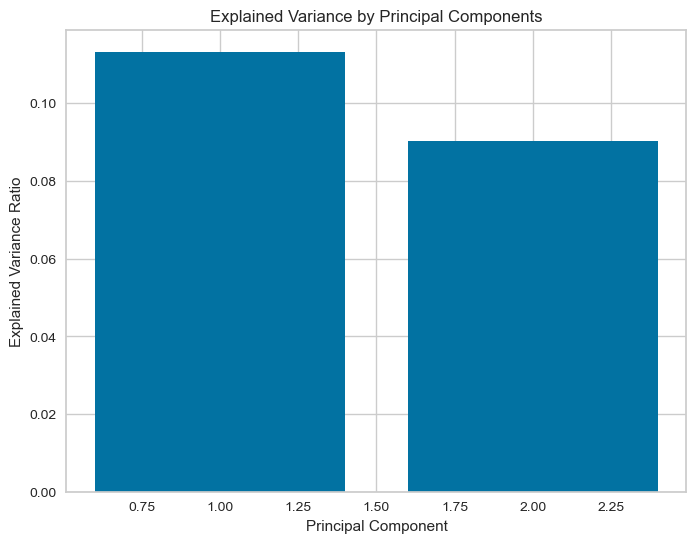

           PC1       PC2
0     1.374125  1.031542
1    -2.441183 -0.612556
2     0.712150 -1.759099
3    -0.622799 -1.268655
4    -0.510199 -0.625383
...        ...       ...
9754 -1.317571 -0.256942
9755 -0.534196  1.573871
9756 -0.609567  3.048428
9757 -1.576700 -0.189400
9758  2.102549 -0.706211

[9759 rows x 2 columns]


In [137]:
df_combined_transformed= df_train_encoded

# Remove the ID and target columns
df_features = df_combined_transformed.drop(columns=[ "target"])

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_features)

# Perform PCA
pca = PCA(n_components=2)  # You can change the number of components
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for the principal components
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

# Display the explained variance by each principal component
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance by each principal component: {explained_variance}")

# Plot the explained variance
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Components')
plt.show()

# Display the transformed dataset with principal components
print(df_pca)

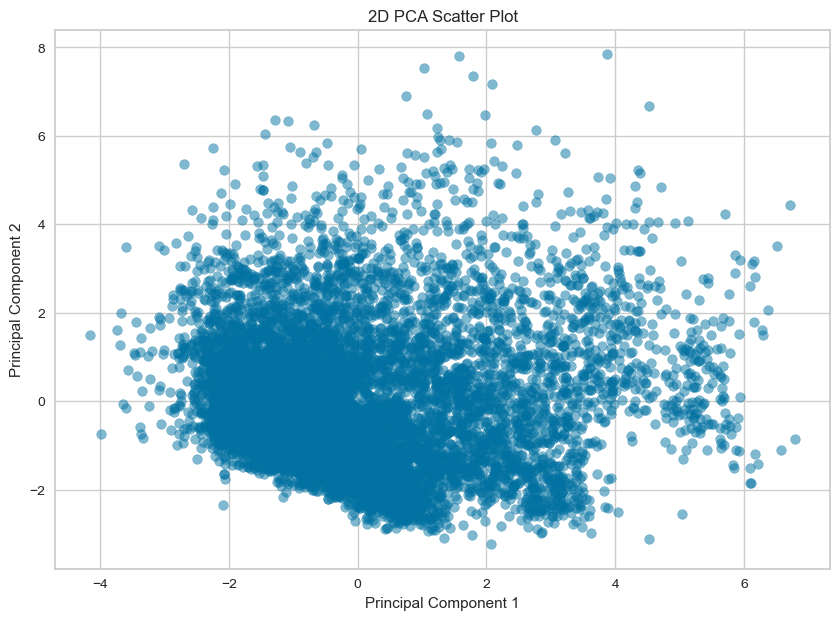

In [138]:
plt.figure(figsize=(10, 7))
plt.scatter(df_pca['PC1'], df_pca['PC2'], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA Scatter Plot')
plt.show()


In [139]:
# Example DataFrame 'df_features' and PCA components
# df_features = pd.DataFrame({...})  # Your feature DataFrame
# pca = PCA(n_components=2)  # Your PCA model

# Get the loadings (weights) of the original features on the principal components
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=df_features.columns)

# Compute the absolute values of the loadings
abs_loadings = loadings.abs()

# Sort by the weights for each principal component
sorted_loadings = pd.concat([
    abs_loadings['PC1'].sort_values(ascending=False),
    abs_loadings['PC2'].sort_values(ascending=False)
], axis=1)

# Rename columns for clarity
sorted_loadings.columns = ['PC1 (sorted)', 'PC2 (sorted)']

print(sorted_loadings)


                                             PC1 (sorted)  PC2 (sorted)
enrolled_university_no_enrollment                0.398807      0.009515
relevent_experience_No relevent experience       0.353153      0.291318
relevent_experience_Has relevent experience      0.353153      0.291318
experience                                       0.349668      0.049743
enrolled_university_Full time course             0.343467      0.016280
City_Development_Education                       0.321207      0.207655
education_level                                  0.249700      0.114351
city_development_index                           0.203332      0.233965
Experience_per_Training_Hour                     0.189562      0.035383
enrolled_university_Part time course             0.180530      0.005868
last_new_job                                     0.167302      0.149347
Job_Change_Experience                            0.141196      0.123505
city                                             0.101743      0

In [140]:
# PCA Loadings DataFrame
pca_loadings = pd.DataFrame({
    'Feature': [
        'enrolled_university_no_enrollment', 'relevent_experience_Has relevent experience',
        'relevent_experience_No relevent experience', 'experience', 'enrolled_university_Full time course',
        'City_Development_Education', 'education_level', 'city_development_index',
        'Experience_per_Training_Hour', 'enrolled_university_Part time course', 'last_new_job',
        'Job_Change_Experience', 'city', 'gender_Male', 'major_discipline_STEM',
        'training_hours', 'gender_Other', 'gender_Female', 'major_discipline_Humanities',
        'company_size', 'major_discipline_Arts', 'company_type', 'major_discipline_No Major',
        'major_discipline_Business Degree', 'major_discipline_Other', 'Company_Stability'
    ],
    'PC1 (sorted)': [
        0.398805, 0.353153, 0.353153, 0.349666, 0.343452,
        0.321203, 0.249694, 0.203337, 0.189566, 0.180545,
        0.167289, 0.141206, 0.101753, 0.061120, 0.053337,
        0.049525, 0.048030, 0.047161, 0.041416, 0.026075,
        0.025284, 0.020528, 0.015096, 0.014475, 0.011603,
        0.005319
    ]
})

# Random Forest Importances DataFrame
rf_importances = pd.DataFrame({
    'Feature': [
        'city_development_index', 'Experience_per_Training_Hour', 'training_hours',
        'City_Development_Education', 'Job_Change_Experience', 'experience', 'city',
        'Company_Stability', 'company_size', 'last_new_job', 'education_level',
        'company_type', 'relevent_experience_Has relevent experience',
        'enrolled_university_no_enrollment', 'enrolled_university_Full time course',
        'gender_Male', 'relevent_experience_No relevent experience', 'gender_Female',
        'major_discipline_STEM', 'enrolled_university_Part time course',
        'major_discipline_Humanities', 'gender_Other', 'major_discipline_Business Degree',
        'major_discipline_Other', 'major_discipline_Arts', 'major_discipline_No Major'
    ],
    'Importance': [
        0.164849, 0.135192, 0.125918, 0.097891, 0.080823,
        0.073130, 0.071610, 0.051203, 0.045819, 0.036112,
        0.023391, 0.017197, 0.008862, 0.008786, 0.008583,
        0.008300, 0.008267, 0.007598, 0.006511, 0.005463,
        0.004465, 0.002312, 0.002219, 0.002093, 0.001874,
        0.001530
    ]
})

# Get the top 20 features from PCA
top_pca_features = pca_loadings.nlargest(20, 'PC1 (sorted)')['Feature']

# Get the top 20 features from Random Forest
top_rf_features = rf_importances.nlargest(20, 'Importance')['Feature']

# Find common features
common_features = set(top_pca_features).intersection(set(top_rf_features))

print("Top 20 features from PCA and Random Forest that are similar:")
print(common_features)


Top 20 features from PCA and Random Forest that are similar:
{'City_Development_Education', 'gender_Female', 'enrolled_university_Part time course', 'company_size', 'experience', 'major_discipline_STEM', 'gender_Male', 'city_development_index', 'Job_Change_Experience', 'relevent_experience_No relevent experience', 'city', 'Experience_per_Training_Hour', 'last_new_job', 'relevent_experience_Has relevent experience', 'training_hours', 'enrolled_university_Full time course', 'education_level', 'enrolled_university_no_enrollment'}


In [141]:
# 8. | Model Implementation

In [142]:
df_train_encoded

city  city_development_index  education_level  experience  company_size  \
0       40                   0.776              3.0        15.0           2.0   
1      162                   0.767              4.0        20.0           2.0   
2      160                   0.920              1.0         5.0           2.0   
3       46                   0.762              3.0        13.0          -1.0   
4      103                   0.920              3.0         7.0           2.0   
...    ...                     ...              ...         ...           ...   
9754   103                   0.920              4.0         9.0           2.0   
9755   160                   0.920              3.0        10.0          -1.0   
9756   103                   0.920              3.0         7.0           1.0   
9757   103                   0.920              3.0        20.0           2.0   
9758    65                   0.802              1.0         1.0           4.0   

      company_type  last_new_job  training_hours  target  \
0              1.0           5.0              47     0.0   
1              0.0           4.0               8     0.0   
2              0.0           1.0              24     0.0   
3              1.0           5.0              18     1.0   
4              1.0           1.0              46     1.0   
...            ...           ...             ...     ...   
9754           1.0           1.0              36     1.0   
9755           2.0           3.0              23     0.0   
9756           0.0           1.0              25     0.0   
9757           1.0           4.0              44     0.0   
9758           1.0           2.0              97     0.0   

      Experience_per_Training_Hour  ...  \
0                         0.312500  ...   
1                         2.222222  ...   
2                         0.200000  ...   
3                         0.684211  ...   
4                         0.148936  ...   
...                            ...  ...   
9754                      0.243243  ...   
9755                      0.416667  ...   
9756                      0.269231  ...   
9757                      0.444444  ...   
9758                      0.010204  ...   

      relevent_experience_No relevent experience  \
0                                              1   
1                                              0   
2                                              0   
3                                              0   
4                                              0   
...                                          ...   
9754                                           0   
9755                                           0   
9756                                           0   
9757                                           0   
9758                                           0   

      enrolled_university_Full time course  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   
...                                    ...   
9754                                     0   
9755                                     0   
9756                                     0   
9757                                     0   
9758                                     0   

      enrolled_university_Part time course  enrolled_university_no_enrollment  \
0                                        0                                  1   
1                                        0                                  1   
2                                        0                                  1   
3                                        0                                  1   
4                                        0                                  1   
...                                    ...                                ...   
9754                                     0        

In [143]:
df_test_encoded

city  city_development_index  education_level  experience  \
0      city_40                   0.776              3.0        15.0   
1     city_162                   0.767              4.0        20.0   
2     city_160                   0.920              1.0         5.0   
3      city_46                   0.762              3.0        13.0   
4     city_103                   0.920              3.0         7.0   
...        ...                     ...              ...         ...   
9754  city_103                   0.920              4.0         9.0   
9755  city_160                   0.920              3.0        10.0   
9756  city_103                   0.920              3.0         7.0   
9757  city_103                   0.920              3.0        20.0   
9758   city_65                   0.802              1.0         1.0   

      company_size  company_type  last_new_job  training_hours  target  \
0              2.0           1.0           5.0              47     3.0   
1              2.0           0.0           4.0               8     3.0   
2              2.0           0.0           1.0              24     3.0   
3             -1.0           1.0           5.0              18     3.0   
4              2.0           1.0           1.0              46     3.0   
...            ...           ...           ...             ...     ...   
9754           2.0           1.0           1.0              36     3.0   
9755          -1.0           2.0           3.0              23     3.0   
9756           1.0           0.0           1.0              25     3.0   
9757           2.0           1.0           4.0              44     3.0   
9758           4.0           1.0           2.0              97     3.0   

      Experience_per_Training_Hour  ...  \
0                         0.312500  ...   
1                         2.222222  ...   
2                         0.200000  ...   
3                         0.684211  ...   
4                         0.148936  ...   
...                            ...  ...   
9754                      0.243243  ...   
9755                      0.416667  ...   
9756                      0.269231  ...   
9757                      0.444444  ...   
9758                      0.010204  ...   

      relevent_experience_No relevent experience  \
0                                              1   
1                                              0   
2                                              0   
3                                              0   
4                                              0   
...                                          ...   
9754                                           0   
9755                                           0   
9756                                           0   
9757                                           0   
9758                                           0   

      enrolled_university_Full time course  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   
...                                    ...   
9754                                     0   
9755                                     0   
9756                                     0   
9757                                     0   
9758                                     0   

      enrolled_university_Part time course  enrolled_university_no_enrollment  \
0                                        0                                  1   
1                                        0                                  1   
2                                        0                                  1   
3                                        0                                  1   
4                                        0                                  1   
...                                    ...                                ...   
9754  

In [144]:
## df_test_encoded_final is the testing data final to predict values it is not part of the prediction algo
df_test_encoded_final = df_test_encoded.drop('city', axis=1, inplace=True)

## We will split the df_train_encoded_final into train and test
df_train_encoded_final = df_train_encoded.drop('city', axis=1, inplace=True)



In [145]:
df_train_encoded
# Print the size of the DataFrame
print(f"Size of df_train_encoded: {df_train_encoded.shape}")


Size of df_train_encoded: (9759, 26)


In [146]:
# Convert target variable to int in the training DataFrame
df_train_encoded['target'] = df_train_encoded['target'].astype(int)

# Calculate the count of each class
target_counts = df_train_encoded['target'].value_counts()

# Calculate the percentage of each class
target_percentages = df_train_encoded['target'].value_counts(normalize=True) * 100

# Display the counts and percentages
print("Counts of 0s and 1s in 'target' column:")
print(target_counts)

print("\nPercentage of 0s and 1s in 'target' column:")
print(target_percentages)




Counts of 0s and 1s in 'target' column:
target
0    8173
1    1586
Name: count, dtype: int64

Percentage of 0s and 1s in 'target' column:
target
0    83.748335
1    16.251665
Name: proportion, dtype: float64


## 8. | Model Implementation

### 8.1 | Random Forest with imbalance classes

Original class distribution:
target
0    83.748335
1    16.251665
Name: proportion, dtype: float64
Confusion Matrix:
[[1567   75]
 [ 200  110]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1642
           1       0.59      0.35      0.44       310

    accuracy                           0.86      1952
   macro avg       0.74      0.65      0.68      1952
weighted avg       0.84      0.86      0.84      1952



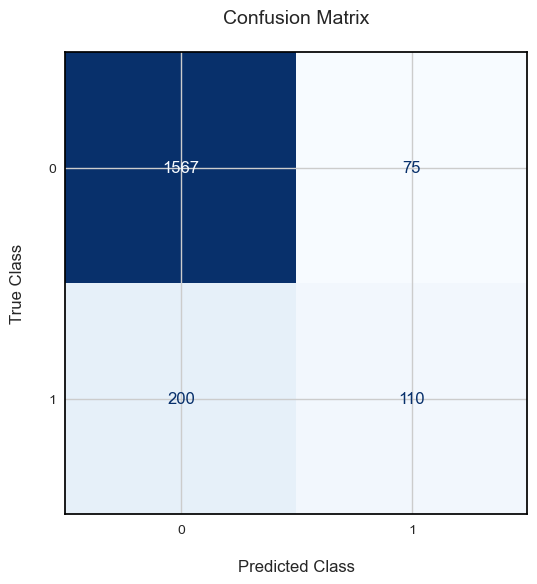

In [147]:
# Assuming df_train_encoded is your training DataFrame
# Separate features and target variable
X = df_train_encoded.drop('target', axis=1)
y = df_train_encoded['target']

# Display the original class distribution
print("Original class distribution:")
print(y.value_counts(normalize=True) * 100)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
model = RandomForestClassifier(random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=['0', '1'])

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax, cmap='Blues', colorbar=False)

# Customizations to match the example
ax.set_title('Confusion Matrix\n', fontsize=14)
ax.tick_params(axis='both', labelsize=10, bottom=True, left=True)
for spine in ax.spines.values():
    spine.set_color('black')
ax.set_xlabel('\nPredicted Class', fontsize=12)
ax.set_ylabel('True Class\n', fontsize=12)
ax.xaxis.set_ticklabels(['0', '1'], rotation=0)
ax.yaxis.set_ticklabels(['0', '1'])

plt.show()


Original class distribution:
target
0    83.748335
1    16.251665
Name: proportion, dtype: float64


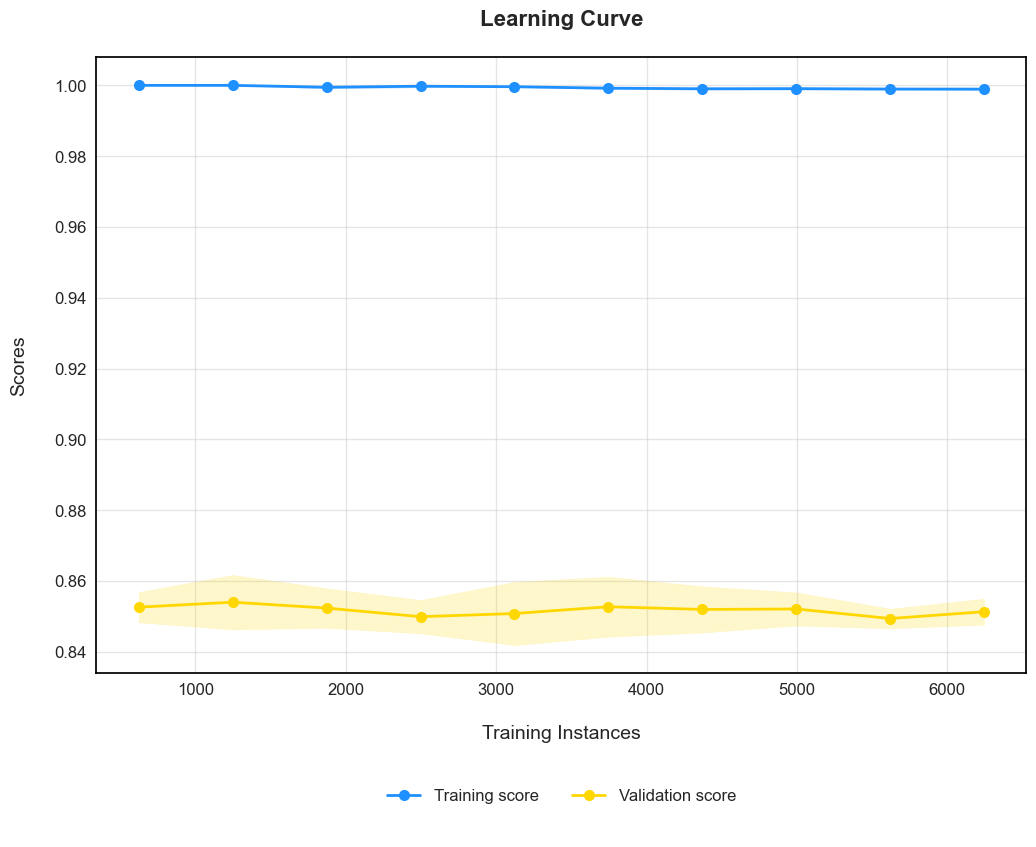

In [148]:
# Ensure plots are displayed inline in Jupyter notebooks
%matplotlib inline

# Assuming df_train_encoded is your training DataFrame
# Separate features and target variable
X = df_train_encoded.drop('target', axis=1)
y = df_train_encoded['target']

# Display the original class distribution
print("Original class distribution:")
print(y.value_counts(normalize=True) * 100)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (optional but common practice for learning curves)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Random Forest model
model = RandomForestClassifier(random_state=42, class_weight='balanced')

# Compute learning curve data without cross-validation
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train_scaled, y_train, 
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='accuracy', 
    n_jobs=-1
)

# Calculate the mean and standard deviation of training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the learning curves
ax.plot(train_sizes, train_mean, 'o-', color='dodgerblue', label='Training score', linewidth=2, markersize=8)
ax.plot(train_sizes, test_mean, 'o-', color='gold', label='Validation score', linewidth=2, markersize=8)

# Plot the confidence intervals with transparency
ax.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color='dodgerblue')
ax.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color='gold')

# Customizations
title_style = {'fontsize': 16, 'fontweight': 'bold'}
tick_params = {'labelsize': 12, 'bottom': True, 'left': True}
color_line = 'black'
xy_label = {'fontsize': 14}
grid_style = {'alpha': 0.5}

# Apply customizations to the plot
ax.set_title('Learning Curve\n', **title_style)
ax.tick_params(axis='both', **tick_params)
ax.grid(axis='both', **grid_style)
for spine in ax.spines.values():
    spine.set_color(color_line)
ax.set_xlabel('\nTraining Instances', **xy_label)
ax.set_ylabel('Scores\n', **xy_label)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.12), ncol=2, borderpad=2, frameon=False, fontsize=12)

# Display the plot
plt.show()


Test set has 1952 samples, not 8000. This is expected because split of the data into training and test sets, with the test set representing 20% of the total data (based on test_size=0.2 in the train_test_split function).
The confusion matrix is based on the 20% of the data reserved for testing. The total number of samples you see in the confusion matrix (1952) is just the test set size. The full dataset size should be approximately five times the size of the test set, based on the 80-20 train-test split ratio.

In [149]:
#!pip install imblearn

### 8.2 | Random Forest with balanced data for Target using SMOTE

In [150]:
# Assuming df_train_encoded is your training DataFrame
X = df_train_encoded.drop('target', axis=1)
y = df_train_encoded['target']

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to oversample the minority class
X_resampled, y_resampled = smote.fit_resample(X, y)

# Display the new class distribution
print("Class distribution after SMOTE:")
print(pd.Series(y_resampled).value_counts(normalize=True) * 100)

# Split the resampled data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Class distribution after SMOTE:
target
0    50.0
1    50.0
Name: proportion, dtype: float64
Confusion Matrix:
[[1505  125]
 [ 200 1440]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      1630
           1       0.92      0.88      0.90      1640

    accuracy                           0.90      3270
   macro avg       0.90      0.90      0.90      3270
weighted avg       0.90      0.90      0.90      3270



Class distribution after SMOTE:
target
0    50.0
1    50.0
Name: proportion, dtype: float64
.:. Classification Report .:.
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      1630
           1       0.92      0.88      0.90      1640

    accuracy                           0.90      3270
   macro avg       0.90      0.90      0.90      3270
weighted avg       0.90      0.90      0.90      3270

.:. Main Metrics .:.
    >> Accuracy: 90.00%
    >> Macro Avg: 90.00%
    >> Weighted Avg: 90.00%



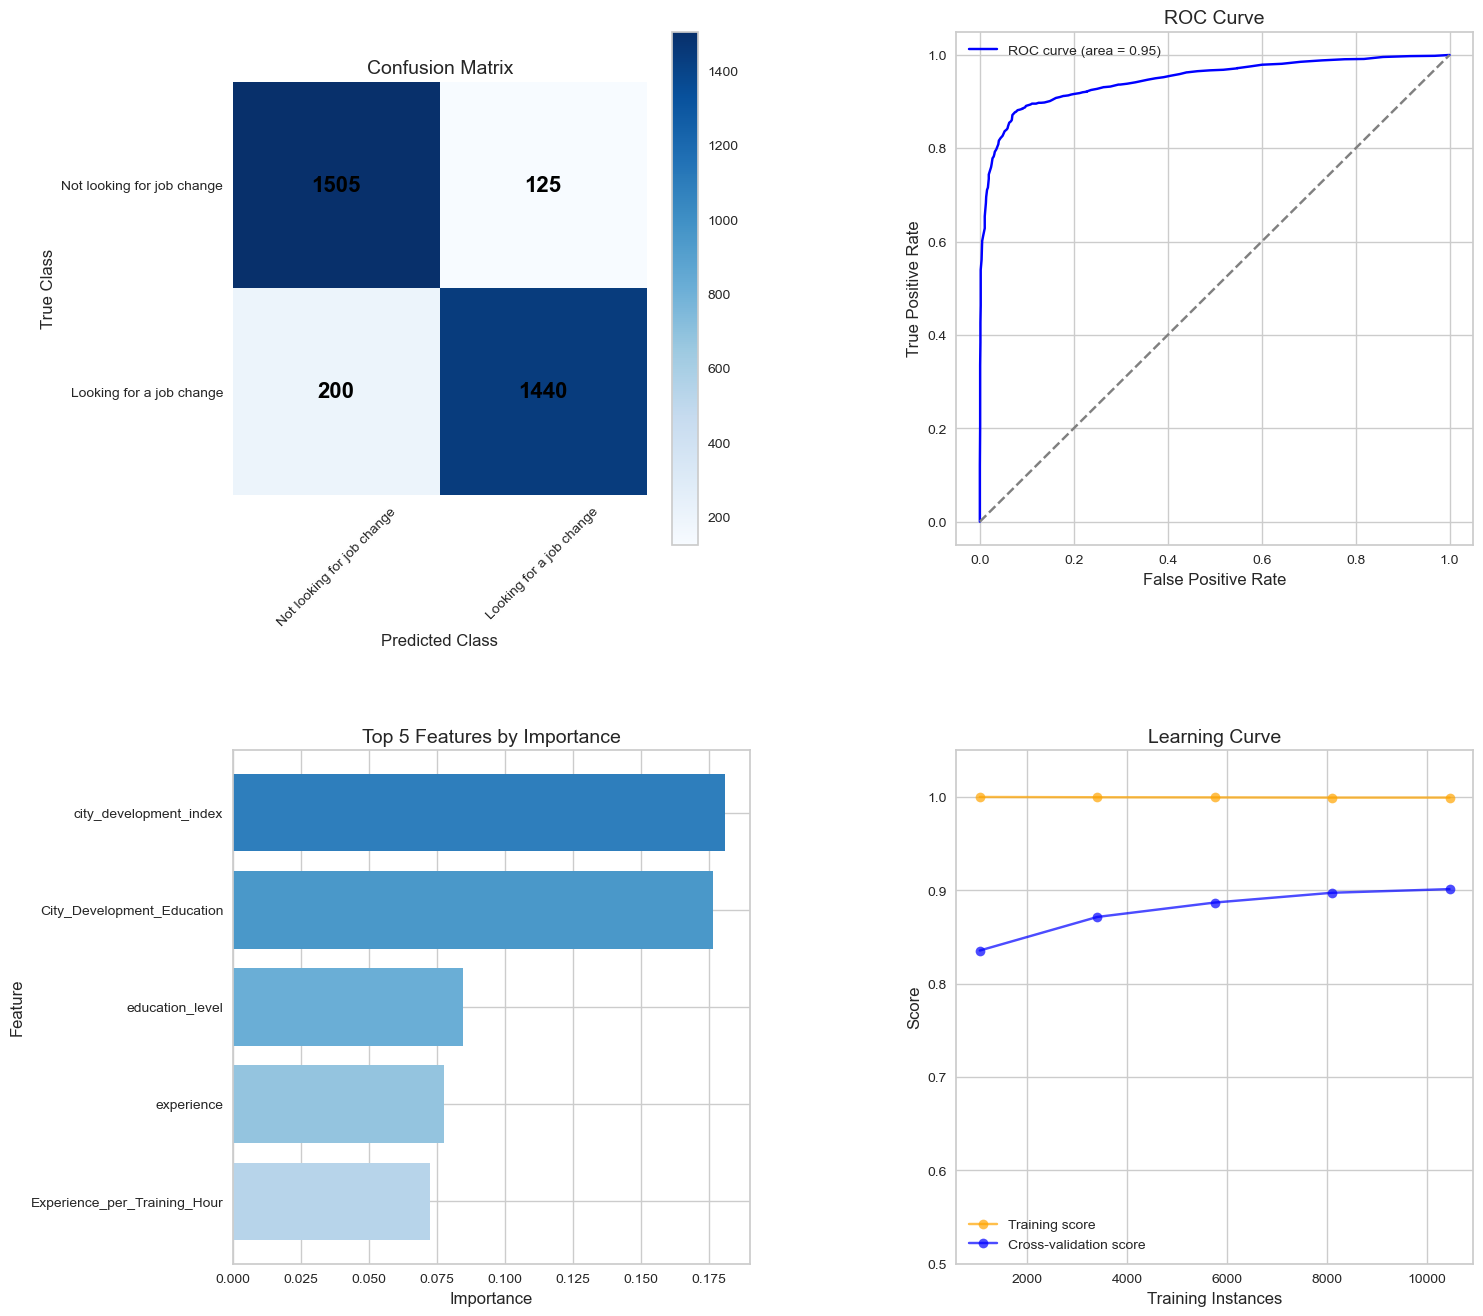

In [151]:
# Assuming df_train_encoded is your training DataFrame
X = df_train_encoded.drop('target', axis=1)
y = df_train_encoded['target']

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to oversample the minority class
X_resampled, y_resampled = smote.fit_resample(X, y)

# Display the new class distribution
print("Class distribution after SMOTE:")
print(pd.Series(y_resampled).value_counts(normalize=True) * 100)

# Split the resampled data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Feature importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
top_features = indices[:5]  # Top 5 features
top_feature_names = X.columns[top_features]
top_feature_importances = importances[top_features]

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

# ROC Curve
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Classification Report
classification_rep = classification_report(y_test, y_pred, output_dict=True)
df_classification_report = pd.DataFrame(classification_rep).transpose().round(2)
df_main_metrics = df_classification_report.loc[['accuracy', 'macro avg', 'weighted avg']]
df_classification_report = df_classification_report.drop(['accuracy', 'macro avg', 'weighted avg'])

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(16, 16))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Top Features Bar Chart
axs[1, 0].barh(top_feature_names[::-1], top_feature_importances[::-1], color=plt.cm.Blues(np.linspace(0.3, 0.7, len(top_feature_names))))
axs[1, 0].set_title('Top 5 Features by Importance', fontsize=14)
axs[1, 0].set_xlabel('Importance', fontsize=12)
axs[1, 0].set_ylabel('Feature', fontsize=12)

# Learning Curve
axs[1, 1].plot(train_sizes, train_mean, 'o-', color='orange', alpha=0.7, label='Training score')
axs[1, 1].plot(train_sizes, test_mean, 'o-', color='blue', alpha=0.7, label='Cross-validation score')
axs[1, 1].set_title('Learning Curve', fontsize=14)
axs[1, 1].set_xlabel('Training Instances', fontsize=12)
axs[1, 1].set_ylabel('Score', fontsize=12)
axs[1, 1].legend(loc='best', fontsize=10)
axs[1, 1].set_ylim([0.5, 1.05])

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cax = axs[0, 0].imshow(cm, interpolation='nearest', cmap='Blues')
axs[0, 0].set_title('Confusion Matrix', fontsize=14)
axs[0, 0].set_xlabel('Predicted Class', fontsize=12)
axs[0, 0].set_ylabel('True Class', fontsize=12)
axs[0, 0].set_xticks([0, 1])
axs[0, 0].set_yticks([0, 1])
axs[0, 0].set_xticklabels(['Not looking for job change', 'Looking for a job change'], rotation=45, fontsize=10)
axs[0, 0].set_yticklabels(['Not looking for job change', 'Looking for a job change'], fontsize=10)
for i in range(2):
    for j in range(2):
        axs[0, 0].text(j, i, f'{cm[i, j]}', ha='center', va='center', color='black', fontsize=16, fontweight='bold')
for spine in axs[0, 0].spines.values():
    spine.set_visible(False)
axs[0, 0].grid(False)
fig.colorbar(cax, ax=axs[0, 0])

# ROC Curve
axs[0, 1].plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
axs[0, 1].plot([0, 1], [0, 1], color='gray', linestyle='--')
axs[0, 1].set_title('ROC Curve', fontsize=14)
axs[0, 1].set_xlabel('False Positive Rate', fontsize=12)
axs[0, 1].set_ylabel('True Positive Rate', fontsize=12)
axs[0, 1].legend(loc='best', fontsize=10)

# Classification Report and Main Metrics in Text Format
report_text = (
    ".:. Classification Report .:.\n"
    f"{classification_report(y_test, y_pred)}\n"
    ".:. Main Metrics .:.\n"
    f"    >> Accuracy: {df_main_metrics.loc['accuracy', 'f1-score'] * 100:.2f}%\n"
    f"    >> Macro Avg: {df_main_metrics.loc['macro avg', 'f1-score'] * 100:.2f}%\n"
    f"    >> Weighted Avg: {df_main_metrics.loc['weighted avg', 'f1-score'] * 100:.2f}%\n"
)
print(report_text)

plt.show()


### 8.3 | Naive Bayes with balance data

Class distribution after SMOTE:
target
0    50.0
1    50.0
Name: proportion, dtype: float64
.:. Classification Report .:.
              precision    recall  f1-score   support

           0       0.83      0.27      0.41      1630
           1       0.57      0.95      0.71      1640

    accuracy                           0.61      3270
   macro avg       0.70      0.61      0.56      3270
weighted avg       0.70      0.61      0.56      3270

.:. Main Metrics .:.
    >> Accuracy: 61.00%
    >> Macro Avg: 56.00%
    >> Weighted Avg: 56.00%



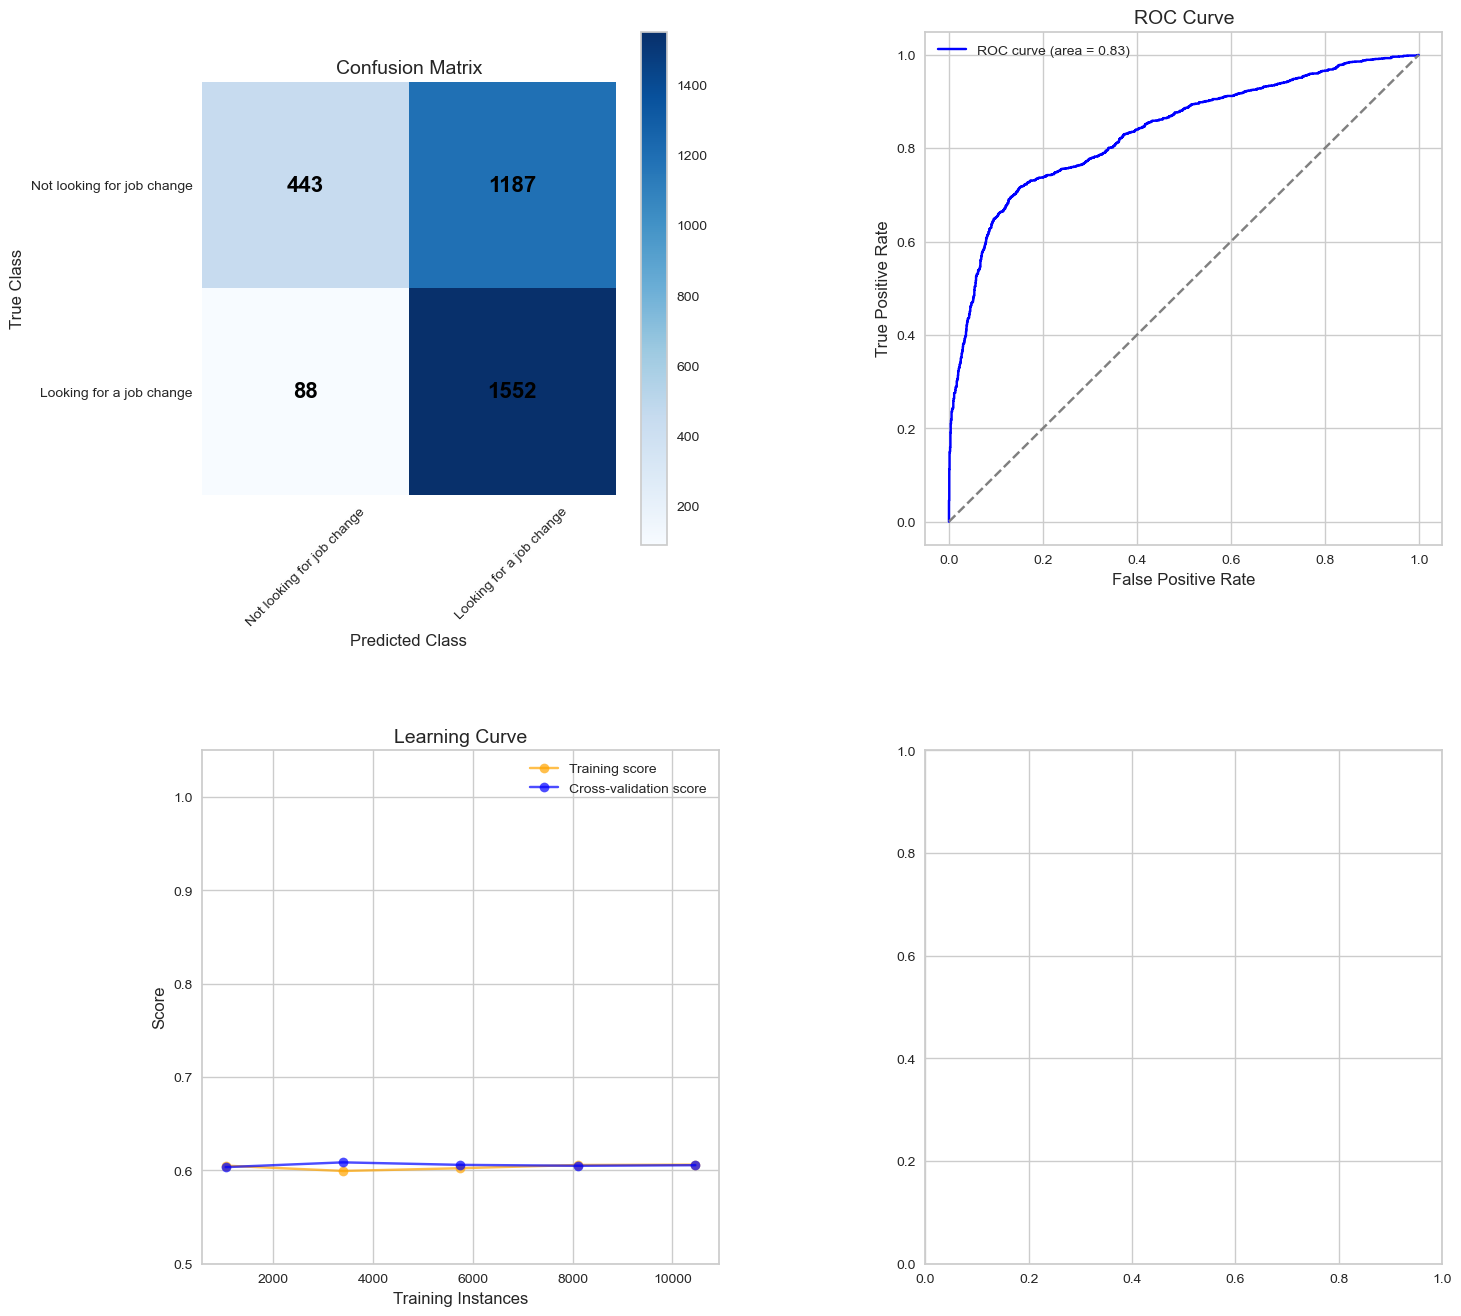

In [152]:
# Assuming df_train_encoded is your training DataFrame
X = df_train_encoded.drop('target', axis=1)
y = df_train_encoded['target']

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to oversample the minority class
X_resampled, y_resampled = smote.fit_resample(X, y)

# Display the new class distribution
print("Class distribution after SMOTE:")
print(pd.Series(y_resampled).value_counts(normalize=True) * 100)

# Split the resampled data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train the model
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Feature importance (Naive Bayes does not provide feature importances, so we will skip this part)
# importances = model.feature_importances_
# indices = np.argsort(importances)[::-1]
# top_features = indices[:5]  # Top 5 features
# top_feature_names = X.columns[top_features]
# top_feature_importances = importances[top_features]

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

# ROC Curve
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Classification Report
classification_rep = classification_report(y_test, y_pred, output_dict=True)
df_classification_report = pd.DataFrame(classification_rep).transpose().round(2)
df_main_metrics = df_classification_report.loc[['accuracy', 'macro avg', 'weighted avg']]
df_classification_report = df_classification_report.drop(['accuracy', 'macro avg', 'weighted avg'])

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(16, 16))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Learning Curve
axs[1, 0].plot(train_sizes, train_mean, 'o-', color='orange', alpha=0.7, label='Training score')
axs[1, 0].plot(train_sizes, test_mean, 'o-', color='blue', alpha=0.7, label='Cross-validation score')
axs[1, 0].set_title('Learning Curve', fontsize=14)
axs[1, 0].set_xlabel('Training Instances', fontsize=12)
axs[1, 0].set_ylabel('Score', fontsize=12)
axs[1, 0].legend(loc='best', fontsize=10)
axs[1, 0].set_ylim([0.5, 1.05])

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cax = axs[0, 0].imshow(cm, interpolation='nearest', cmap='Blues')
axs[0, 0].set_title('Confusion Matrix', fontsize=14)
axs[0, 0].set_xlabel('Predicted Class', fontsize=12)
axs[0, 0].set_ylabel('True Class', fontsize=12)
axs[0, 0].set_xticks([0, 1])
axs[0, 0].set_yticks([0, 1])
axs[0, 0].set_xticklabels(['Not looking for job change', 'Looking for a job change'], rotation=45, fontsize=10)
axs[0, 0].set_yticklabels(['Not looking for job change', 'Looking for a job change'], fontsize=10)
for i in range(2):
    for j in range(2):
        axs[0, 0].text(j, i, f'{cm[i, j]}', ha='center', va='center', color='black', fontsize=16, fontweight='bold')
for spine in axs[0, 0].spines.values():
    spine.set_visible(False)
axs[0, 0].grid(False)
fig.colorbar(cax, ax=axs[0, 0])

# ROC Curve
axs[0, 1].plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
axs[0, 1].plot([0, 1], [0, 1], color='gray', linestyle='--')
axs[0, 1].set_title('ROC Curve', fontsize=14)
axs[0, 1].set_xlabel('False Positive Rate', fontsize=12)
axs[0, 1].set_ylabel('True Positive Rate', fontsize=12)
axs[0, 1].legend(loc='best', fontsize=10)

# Classification Report and Main Metrics in Text Format
report_text = (
    ".:. Classification Report .:.\n"
    f"{classification_report(y_test, y_pred)}\n"
    ".:. Main Metrics .:.\n"
    f"    >> Accuracy: {df_main_metrics.loc['accuracy', 'f1-score'] * 100:.2f}%\n"
    f"    >> Macro Avg: {df_main_metrics.loc['macro avg', 'f1-score'] * 100:.2f}%\n"
    f"    >> Weighted Avg: {df_main_metrics.loc['weighted avg', 'f1-score'] * 100:.2f}%\n"
)
print(report_text)

plt.show()


### 8.4 | Naive Bayes with PCA to improve accuracy

Explained variance by each principal component: [0.1170294 0.0928244]


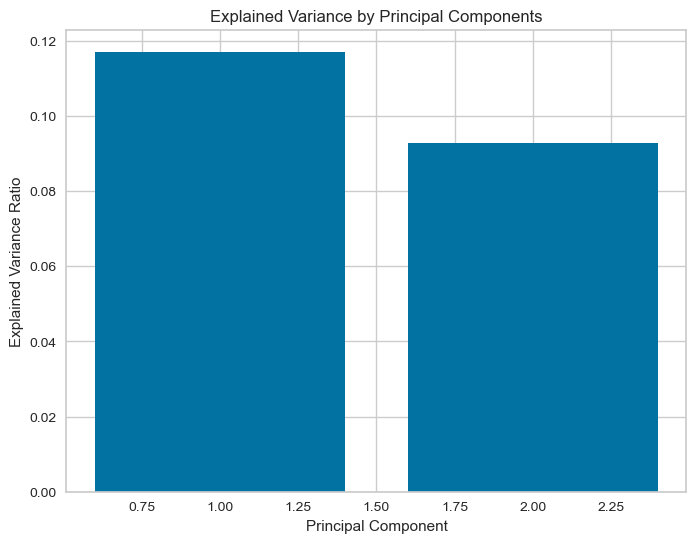

Class distribution after SMOTE:
target
0    50.0
1    50.0
Name: proportion, dtype: float64
.:. Classification Report .:.
              precision    recall  f1-score   support

           0       0.62      0.69      0.65      1630
           1       0.65      0.59      0.62      1640

    accuracy                           0.64      3270
   macro avg       0.64      0.64      0.64      3270
weighted avg       0.64      0.64      0.64      3270

.:. Main Metrics .:.
    >> Accuracy: 64.00%
    >> Macro Avg: 64.00%
    >> Weighted Avg: 64.00%



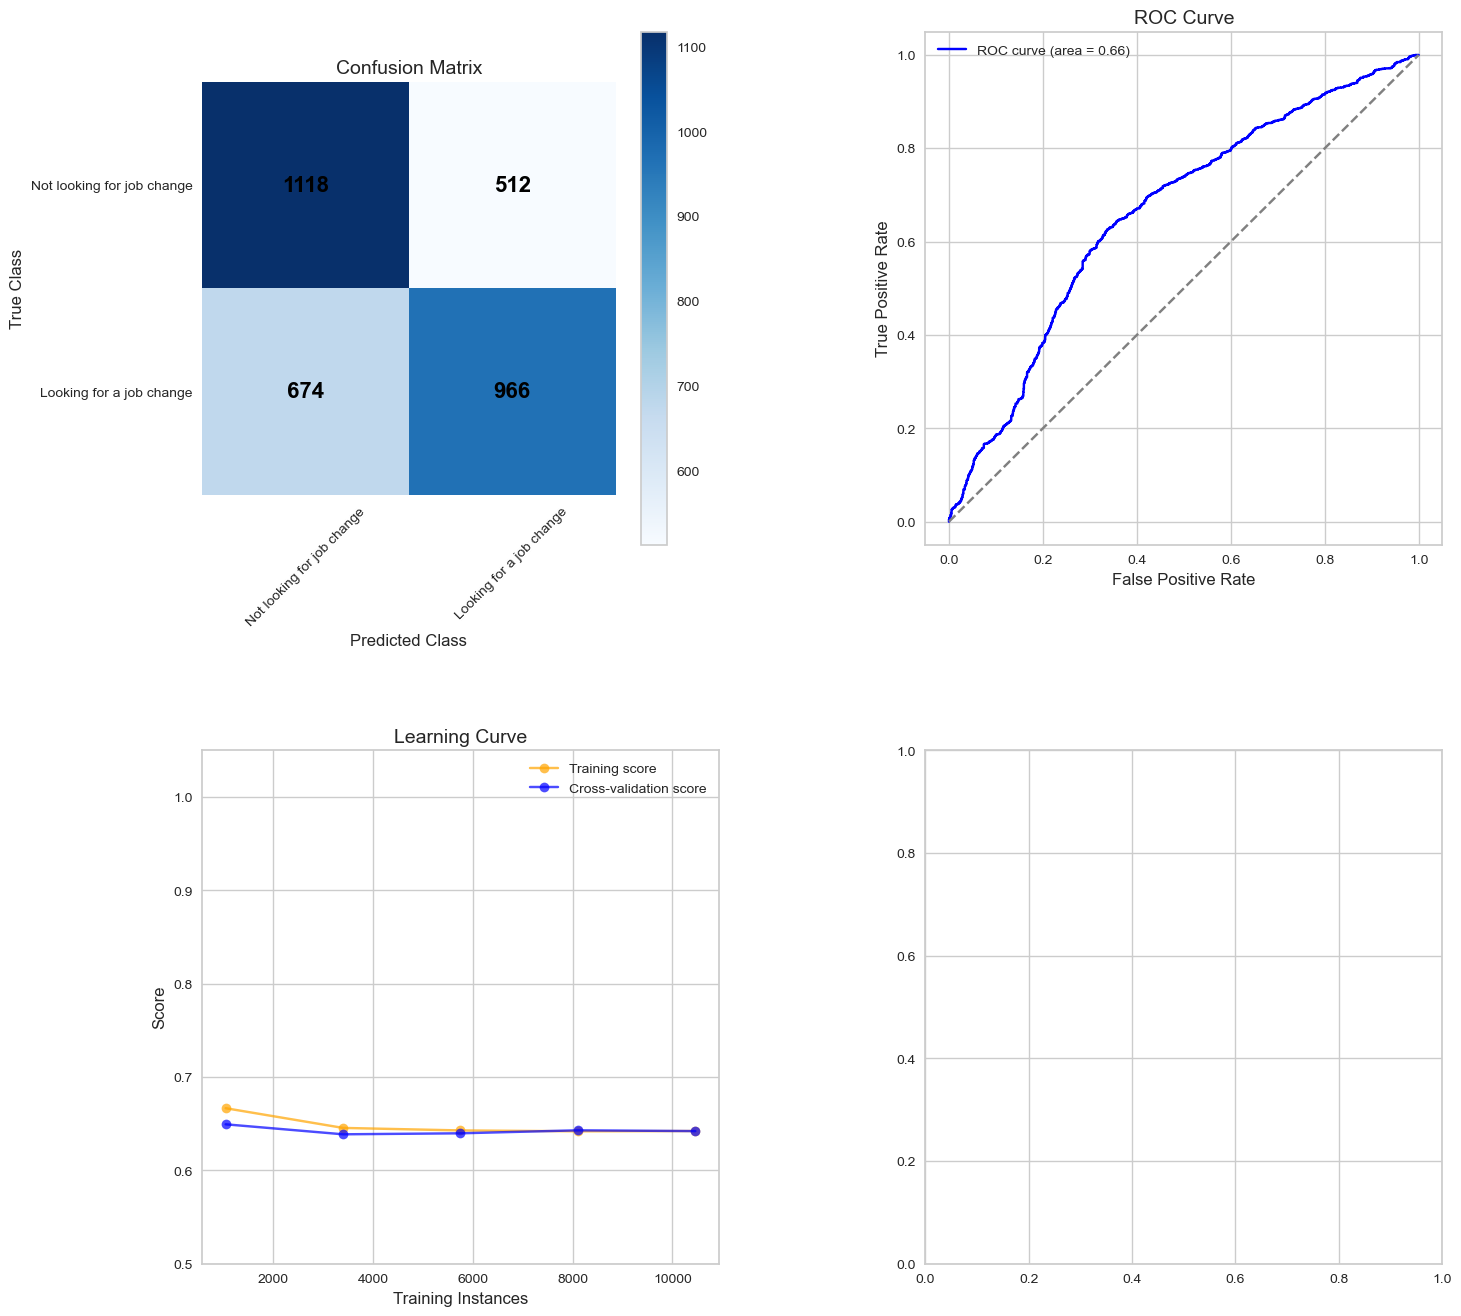

In [153]:
# Assuming df_train_encoded is your training DataFrame
df_combined_transformed = df_train_encoded

# Remove the ID and target columns
df_features = df_combined_transformed.drop(columns=["target"])

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_features)

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for the principal components
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

# Display the explained variance by each principal component
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance by each principal component: {explained_variance}")

# Plot the explained variance
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Components')
plt.show()

# Add the target column back to df_pca
df_pca['target'] = df_combined_transformed['target']

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to oversample the minority class
X_resampled, y_resampled = smote.fit_resample(df_pca.drop(columns=['target']), df_pca['target'])

# Display the new class distribution
print("Class distribution after SMOTE:")
print(pd.Series(y_resampled).value_counts(normalize=True) * 100)

# Split the resampled data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train the model
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

# ROC Curve
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Classification Report
classification_rep = classification_report(y_test, y_pred, output_dict=True)
df_classification_report = pd.DataFrame(classification_rep).transpose().round(2)
df_main_metrics = df_classification_report.loc[['accuracy', 'macro avg', 'weighted avg']]
df_classification_report = df_classification_report.drop(['accuracy', 'macro avg', 'weighted avg'])

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(16, 16))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Learning Curve
axs[1, 0].plot(train_sizes, train_mean, 'o-', color='orange', alpha=0.7, label='Training score')
axs[1, 0].plot(train_sizes, test_mean, 'o-', color='blue', alpha=0.7, label='Cross-validation score')
axs[1, 0].set_title('Learning Curve', fontsize=14)
axs[1, 0].set_xlabel('Training Instances', fontsize=12)
axs[1, 0].set_ylabel('Score', fontsize=12)
axs[1, 0].legend(loc='best', fontsize=10)
axs[1, 0].set_ylim([0.5, 1.05])

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cax = axs[0, 0].imshow(cm, interpolation='nearest', cmap='Blues')
axs[0, 0].set_title('Confusion Matrix', fontsize=14)
axs[0, 0].set_xlabel('Predicted Class', fontsize=12)
axs[0, 0].set_ylabel('True Class', fontsize=12)
axs[0, 0].set_xticks([0, 1])
axs[0, 0].set_yticks([0, 1])
axs[0, 0].set_xticklabels(['Not looking for job change', 'Looking for a job change'], rotation=45, fontsize=10)
axs[0, 0].set_yticklabels(['Not looking for job change', 'Looking for a job change'], fontsize=10)
for i in range(2):
    for j in range(2):
        axs[0, 0].text(j, i, f'{cm[i, j]}', ha='center', va='center', color='black', fontsize=16, fontweight='bold')
for spine in axs[0, 0].spines.values():
    spine.set_visible(False)
axs[0, 0].grid(False)
fig.colorbar(cax, ax=axs[0, 0])

# ROC Curve
axs[0, 1].plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
axs[0, 1].plot([0, 1], [0, 1], color='gray', linestyle='--')
axs[0, 1].set_title('ROC Curve', fontsize=14)
axs[0, 1].set_xlabel('False Positive Rate', fontsize=12)
axs[0, 1].set_ylabel('True Positive Rate', fontsize=12)
axs[0, 1].legend(loc='best', fontsize=10)

# Print the classification report
report_text = (
    ".:. Classification Report .:.\n"
    f"{classification_report(y_test, y_pred)}\n"
    ".:. Main Metrics .:.\n"
    f"    >> Accuracy: {df_main_metrics.loc['accuracy', 'f1-score'] * 100:.2f}%\n"
    f"    >> Macro Avg: {df_main_metrics.loc['macro avg', 'f1-score'] * 100:.2f}%\n"
    f"    >> Weighted Avg: {df_main_metrics.loc['weighted avg', 'f1-score'] * 100:.2f}%\n"
)
print(report_text)

plt.show()



### 8.5 | Neural Networks

Class distribution after SMOTE:
target
0    50.0
1    50.0
Name: proportion, dtype: float64
.:. Classification Report .:.
              precision    recall  f1-score   support

           0       0.87      0.82      0.84      1630
           1       0.83      0.88      0.85      1640

    accuracy                           0.85      3270
   macro avg       0.85      0.85      0.85      3270
weighted avg       0.85      0.85      0.85      3270

.:. Main Metrics .:.
    >> Accuracy: 85.00%
    >> Macro Avg: 85.00%
    >> Weighted Avg: 85.00%



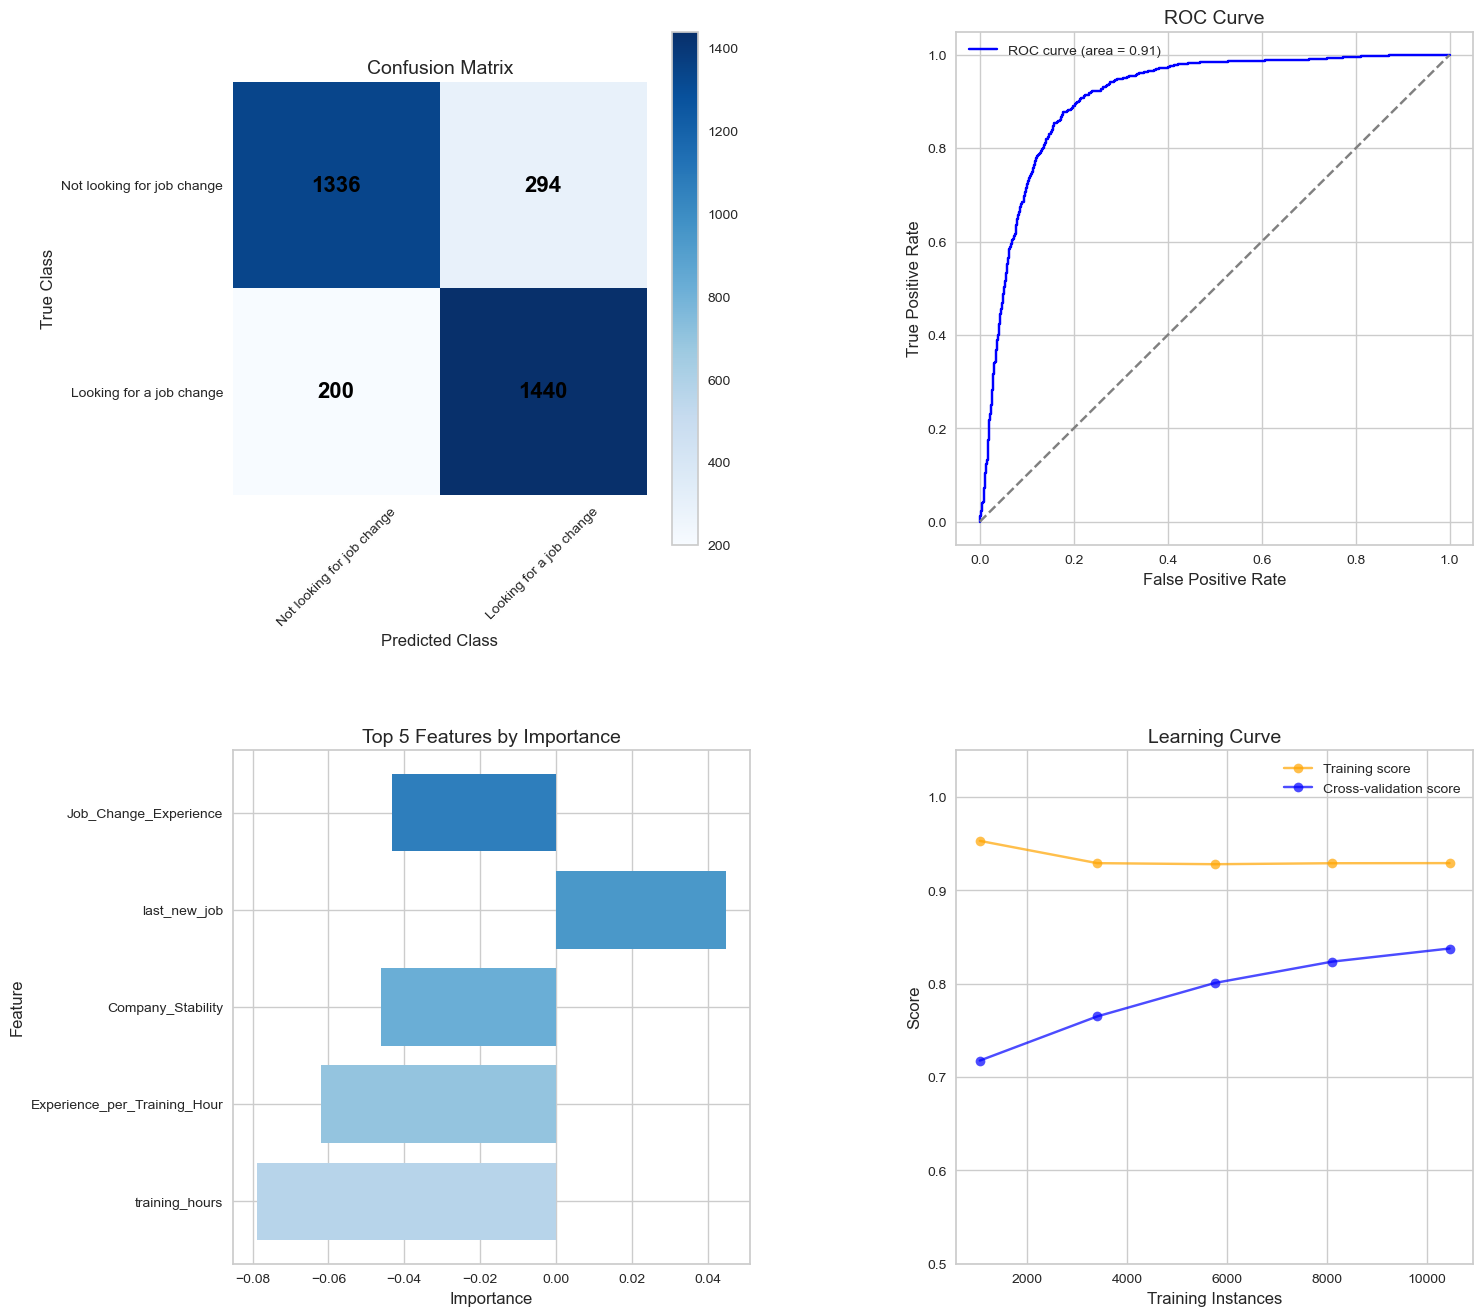

In [154]:
# Assuming df_train_encoded is your training DataFrame
df_combined_transformed = df_train_encoded

# Remove the ID and target columns
df_features = df_combined_transformed.drop(columns=["target"])

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_features)

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to oversample the minority class
X_resampled, y_resampled = smote.fit_resample(X_scaled, df_combined_transformed['target'])

# Display the new class distribution
print("Class distribution after SMOTE:")
print(pd.Series(y_resampled).value_counts(normalize=True) * 100)

# Split the resampled data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train the Neural Network model
model = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

# ROC Curve
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Classification Report
classification_rep = classification_report(y_test, y_pred, output_dict=True)
df_classification_report = pd.DataFrame(classification_rep).transpose().round(2)
df_main_metrics = df_classification_report.loc[['accuracy', 'macro avg', 'weighted avg']]
df_classification_report = df_classification_report.drop(['accuracy', 'macro avg', 'weighted avg'])

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(16, 16))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Top Features Bar Chart
feature_importances = model.coefs_[0].mean(axis=1)  # Simplistic way to estimate feature importance
top_features = np.argsort(np.abs(feature_importances))[-5:]  # Top 5 features
top_feature_names = df_features.columns[top_features]
top_feature_importances = feature_importances[top_features]

axs[1, 0].barh(top_feature_names[::-1], top_feature_importances[::-1], color=plt.cm.Blues(np.linspace(0.3, 0.7, len(top_feature_names))))
axs[1, 0].set_title('Top 5 Features by Importance', fontsize=14)
axs[1, 0].set_xlabel('Importance', fontsize=12)
axs[1, 0].set_ylabel('Feature', fontsize=12)

# Learning Curve
axs[1, 1].plot(train_sizes, train_mean, 'o-', color='orange', alpha=0.7, label='Training score')
axs[1, 1].plot(train_sizes, test_mean, 'o-', color='blue', alpha=0.7, label='Cross-validation score')
axs[1, 1].set_title('Learning Curve', fontsize=14)
axs[1, 1].set_xlabel('Training Instances', fontsize=12)
axs[1, 1].set_ylabel('Score', fontsize=12)
axs[1, 1].legend(loc='best', fontsize=10)
axs[1, 1].set_ylim([0.5, 1.05])

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cax = axs[0, 0].imshow(cm, interpolation='nearest', cmap='Blues')
axs[0, 0].set_title('Confusion Matrix', fontsize=14)
axs[0, 0].set_xlabel('Predicted Class', fontsize=12)
axs[0, 0].set_ylabel('True Class', fontsize=12)
axs[0, 0].set_xticks([0, 1])
axs[0, 0].set_yticks([0, 1])
axs[0, 0].set_xticklabels(['Not looking for job change', 'Looking for a job change'], rotation=45, fontsize=10)
axs[0, 0].set_yticklabels(['Not looking for job change', 'Looking for a job change'], fontsize=10)
for i in range(2):
    for j in range(2):
        axs[0, 0].text(j, i, f'{cm[i, j]}', ha='center', va='center', color='black', fontsize=16, fontweight='bold')
for spine in axs[0, 0].spines.values():
    spine.set_visible(False)
axs[0, 0].grid(False)
fig.colorbar(cax, ax=axs[0, 0])

# ROC Curve
axs[0, 1].plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
axs[0, 1].plot([0, 1], [0, 1], color='gray', linestyle='--')
axs[0, 1].set_title('ROC Curve', fontsize=14)
axs[0, 1].set_xlabel('False Positive Rate', fontsize=12)
axs[0, 1].set_ylabel('True Positive Rate', fontsize=12)
axs[0, 1].legend(loc='best', fontsize=10)

# Print the classification report
report_text = (
    ".:. Classification Report .:.\n"
    f"{classification_report(y_test, y_pred)}\n"
    ".:. Main Metrics .:.\n"
    f"    >> Accuracy: {df_main_metrics.loc['accuracy', 'f1-score'] * 100:.2f}%\n"
    f"    >> Macro Avg: {df_main_metrics.loc['macro avg', 'f1-score'] * 100:.2f}%\n"
    f"    >> Weighted Avg: {df_main_metrics.loc['weighted avg', 'f1-score'] * 100:.2f}%\n"
)
print(report_text)

plt.show()


### 8.6 | Logistic Regression

# 9. | Model Evaluation

#### Chart of all ROC together and Table comparison of evaluation metrics in a table

# 10. | Conclusions

### Business context conclusions